# Australian House Price Prediction - Assignment

# Business Understanding
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

>> Which variables are significant in predicting the price of a house, and

>> How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Cleaning

In [1]:
##  import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
##  load the housing file into a dataframe
house =  pd.read_csv('train.csv')

In [3]:
## check if the file is loaded ok
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
## check the shape of the dataframe
house.shape

(1460, 81)

In [5]:
## check the column details of the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## check the null values in the dataframe
house.isnull().sum()/house.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
## drop the Alley column as it has large number of nulls
house.drop(columns='Alley', inplace=True)

In [8]:
###  check the values in the FireplaceQU
house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [9]:
## check the FireplaceQu along with Fireplaces
house[house['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
17             0         NaN
18             0         NaN
19             0         NaN
26             0         NaN
29             0         NaN
30             0         NaN
31             0         NaN
32             0         NaN
36             0         NaN
38             0         NaN
39             0         NaN
42             0         NaN
43             0         NaN
44             0         NaN
47             0         NaN
48             0         NaN
49             0         NaN
50             0         NaN
52             0         NaN
56             0         NaN
57             0         NaN
59             0         NaN
60             0         NaN
61             0         NaN
63             0         NaN
64             0         NaN
67             0         NaN
68             0         NaN
71             0         NaN
73             0         NaN
74             0         NaN
75             0         NaN
76             0         NaN
77             0         NaN
78             0         NaN
79             0         NaN
81             0         NaN
83             0         NaN
87             0         NaN
88             0         NaN
89             0         NaN
90             0         NaN
91             0         NaN
92             0         NaN
94             0         NaN
96             0         NaN
97             0         NaN
98             0         NaN
99             0         NaN
102            0         NaN
103            0         NaN
106            0         NaN
107            0         NaN
108            0         NaN
110            0         NaN
117            0         NaN
121            0         NaN
122            0         NaN
123            0         NaN
125            0         NaN
129            0         NaN
132            0         NaN
133            0         NaN
137            0         NaN
139            0         NaN
141            0         NaN
142            0         NaN
143            0         NaN
144            0         NaN
145            0         NaN
146            0         NaN
148            0         NaN
149            0         NaN
150            0         NaN
154            0         NaN
155            0         NaN
156            0         NaN
160            0         NaN
163            0         NaN
164            0         NaN
165            0         NaN
170            0         NaN
179            0         NaN
183            0         NaN
184            0         NaN
186            0         NaN
187            0         NaN
191            0         NaN
192            0         NaN
193            0         NaN
194            0         NaN
198            0         NaN
200            0         NaN
202            0         NaN
204            0         NaN
205            0         NaN
209            0         NaN
210            0         NaN
211            0         NaN
213            0         NaN
214            0         NaN
216            0         NaN
217            0         NaN
219            0         NaN
220            0         NaN
223            0         NaN
225            0         NaN
227            0         NaN
230            0         NaN
233            0         NaN
235            0         NaN
236            0         NaN
237            0         NaN
238            0         NaN
240            0         NaN
241            0         NaN
242            0         NaN
246            0         NaN
248            0         NaN
250            0         NaN
252            0         NaN
253            0         NaN
254            0         NaN
256            0         NaN
259            0         NaN
263            0         NaN
264            0         NaN
274            0         NaN
275            0         NaN
276            0         NaN
277            0         NaN
281            0         NaN
284 

In [10]:
###  check the values in the FireplaceQU
house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
## The FireplaceQU has nulls where there are no Fireplaces.  So replace the Nulls with NA
house['FireplaceQu'] = house['FireplaceQu'].fillna('NA')

In [12]:
## check if the NA is updated correctly
house['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
## Drop the PoolQC column as it has large number of null values
house.drop(columns='PoolQC',inplace=True)

In [14]:
## Drop the Fence column as it has large number of null values
house.drop(columns='Fence',inplace=True)

In [15]:
## Drop the 
house.drop(columns='MiscFeature',inplace=True)

In [16]:
## check the % of null values in the columns
house.isnull().sum()/house.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [17]:
## check the range of values in LotFrontage
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
## check the rows that have null values in LotFrontage
house[house['LotFrontage'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
7        8          60       RL          NaN    10382   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
14      15          20       RL          NaN    10920   Pave      IR1   
16      17          20       RL          NaN    11241   Pave      IR1   
24      25          20       RL          NaN     8246   Pave      IR1   
31      32          20       RL          NaN     8544   Pave      IR1   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
50      51          60       RL          NaN    13869   Pave      IR2   
64      65          60       RL          NaN     9375   Pave      Reg   
66      67          20       RL          NaN    19900   Pave      Reg   
76      77          20       RL          NaN     8475   Pave      IR1   
84      85          80       RL          NaN     8530   Pave      IR1   
95      96          60       RL          NaN     9765   Pave      IR2   
100    101          20       RL          NaN    10603   Pave      IR1   
104    105          50       RM          NaN     7758   Pave      Reg   
111    112          80       RL          NaN     7750   Pave      IR1   
113    114          20       RL          NaN    21000   Pave      Reg   
116    117          20       RL          NaN    11616   Pave      Reg   
120    121          80       RL          NaN    21453   Pave      IR1   
126    127         120       RL          NaN     4928   Pave      IR1   
131    132          60       RL          NaN    12224   Pave      IR1   
133    134          20       RL          NaN     6853   Pave      IR1   
136    137          20       RL          NaN    10355   Pave      IR1   
147    148          60       RL          NaN     9505   Pave      IR1   
149    150          50       RM          NaN     6240   Pave      Reg   
152    153          60       RL          NaN    14803   Pave      IR1   
153    154          20       RL          NaN    13500   Pave      Reg   
160    161          20       RL          NaN    11120   Pave      IR1   
166    167          20       RL          NaN    10708   Pave      IR1   
169    170          20       RL          NaN    16669   Pave      IR1   
170    171          50       RM          NaN    12358   Pave      IR1   
177    178          50       RL          NaN    13650   Pave      Reg   
180    181         160       FV          NaN     2117   Pave      Reg   
186    187          80       RL          NaN     9947   Pave      IR1   
191    192          60       RL          NaN     7472   Pave      IR1   
203    204         120       RM          NaN     4438   Pave      Reg   
207    208          20       RL          NaN    12493   Pave      IR1   
208    209          60       RL          NaN    14364   Pave      IR1   
214    215          60       RL          NaN    10900   Pave      IR1   
218    219          50       RL          NaN    15660   Pave      IR1   
221    222          60       RL          NaN     8068   Pave      IR1   
234    235          60       RL          NaN     7851   Pave      Reg   
237    238          60       RL          NaN     9453   Pave      IR1   
244    245          60       RL          NaN     8880   Pave      IR1   
249    250          50       RL          NaN   159000   Pave      IR2   
269    270          20       RL          NaN     7917   Pave      IR1   
287    288          20       RL          NaN     8125   Pave      IR1   
288    289          20       RL          NaN     9819   Pave      IR1   
293    294          60       RL          NaN    16659   Pave      IR1   
307    308          50       RM          NaN     7920   Pave      IR1   
308    309          30       RL          NaN    12342   Pave      IR1   
310    311          60       RL          NaN     7685   Pave      IR1   
319    320          80       RL          NaN    14115   Pave      

In [19]:
# Obtain the median value in the LotFrontage column
LotFrontage_median = house['LotFrontage'].median()

In [20]:
# Set the median value for LotFrontage that are missing
house['LotFrontage'] = house['LotFrontage'].fillna(LotFrontage_median)

In [21]:
## check if MasVnrType and MasVnrArea are both Nulls together
house[house['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [22]:
## check the value counts in MasVnrType
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
## check the range of values in MasVnrArea
house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
MasVnrType_mode  = house['MasVnrType'].mode()
MasVnrType_mode.values[0]

'None'

In [25]:
MasVnrArea_median  = house['MasVnrArea'].median()
MasVnrArea_median

0.0

In [26]:
## impute the null MasVnrType with the mode
house['MasVnrType'] = house['MasVnrType'].fillna(MasVnrType_mode.values[0])

In [27]:
## imput the null MasVnrType with the median
house['MasVnrArea'] = house['MasVnrArea'].fillna(MasVnrArea_median)

In [28]:
## check the value counts in MasVnrType
house['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [29]:
## check the range of values in MasVnrArea
house['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [30]:
## check the value counts in BsmtQual
house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [31]:
## Check all the other Basement attributes where BasementQual is null
house[house['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  
17             0  
39             0  
90             0  
102            0  
156            0  
182            0  
259            0  
342            0  
362            0  
371            0  
392            0  
520            0  
532            0  
533            0  
553            0  
646            0  
705            0  
736            0  
749            0  
778            0  
868            0  
894            0  
897            0  
984            0  
1000           0  
1011           0  
1035           0  
1045           0  
1048           0  
1049           0  
1090           0  
1179           0  
1216           0  
1218           0  
1232           0  
1321           0  
1412           0

In [32]:
## For all the above rows the Basement square Feet is 0.  Hence these houses dont have basements.  So set all ther related variables to NA i.e No Basement
house.loc[house[house['BsmtQual'].isnull()].index,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

In [33]:
## There is house which has not basement for values for BaseQual . This is not valid
house[house['BsmtExposure'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  
948           0

In [34]:
## There is house which has not basement for values for BaseQual . This is not valid
house[house['BsmtFinType2'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   

     BsmtFinSF2  
332         479

In [35]:
## delete the rows identified above
house = house[~house['BsmtExposure'].isnull()]
house = house[~house['BsmtFinType2'].isnull()]

In [36]:
## check the values in the Electrical column
house['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
## remove the rows that have null in this column as there is no way to impute
house = house[~house['Electrical'].isnull()]

In [38]:
## check the Garage columns for nulls
house[house['GarageType'].isnull()][['GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond
39          NaN          NaN           0           0        NaN        NaN
48          NaN          NaN           0           0        NaN        NaN
78          NaN          NaN           0           0        NaN        NaN
88          NaN          NaN           0           0        NaN        NaN
89          NaN          NaN           0           0        NaN        NaN
99          NaN          NaN           0           0        NaN        NaN
108         NaN          NaN           0           0        NaN        NaN
125         NaN          NaN           0           0        NaN        NaN
127         NaN          NaN           0           0        NaN        NaN
140         NaN          NaN           0           0        NaN        NaN
148         NaN          NaN           0           0        NaN        NaN
155         NaN          NaN           0           0        NaN        NaN
163         NaN          NaN           0           0        NaN        NaN
165         NaN          NaN           0           0        NaN        NaN
198         NaN          NaN           0           0        NaN        NaN
210         NaN          NaN           0           0        NaN        NaN
241         NaN          NaN           0           0        NaN        NaN
250         NaN          NaN           0           0        NaN        NaN
287         NaN          NaN           0           0        NaN        NaN
291         NaN          NaN           0           0        NaN        NaN
307         NaN          NaN           0           0        NaN        NaN
375         NaN          NaN           0           0        NaN        NaN
386         NaN          NaN           0           0        NaN        NaN
393         NaN          NaN           0           0        NaN        NaN
431         NaN          NaN           0           0        NaN        NaN
434         NaN          NaN           0           0        NaN        NaN
441         NaN          NaN           0           0        NaN        NaN
464         NaN          NaN           0           0        NaN        NaN
495         NaN          NaN           0           0        NaN        NaN
520         NaN          NaN           0           0        NaN        NaN
528         NaN          NaN           0           0        NaN        NaN
533         NaN          NaN           0           0        NaN        NaN
535         NaN          NaN           0           0        NaN        NaN
562         NaN          NaN           0           0        NaN        NaN
582         NaN          NaN           0           0        NaN        NaN
613         NaN          NaN           0           0        NaN        NaN
614         NaN          NaN           0           0        NaN        NaN
620         NaN          NaN           0           0        NaN        NaN
635         NaN          NaN           0           0        NaN        NaN
636         NaN          NaN           0           0        NaN        NaN
638         NaN          NaN           0           0        NaN        NaN
649         NaN          NaN           0           0        NaN        NaN
705         NaN          NaN           0           0        NaN        NaN
710         NaN          NaN           0           0        NaN        NaN
738         NaN          NaN           0           0        NaN        NaN
750         NaN          NaN           0           0        NaN        NaN
784         NaN          NaN           0           0        NaN        NaN
826         NaN          NaN           0           0        NaN        NaN
843         NaN          NaN           0           0        NaN        NaN
921         NaN          NaN           0           0        NaN        NaN
942         NaN          NaN           0           0        NaN        NaN
954         NaN          NaN           0           0        NaN        NaN
960         NaN          NaN  

In [39]:
## check the value counts in GarageType
house['GarageType'].value_counts()

Attchd     868
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
##  The Garage area and Garage cares are 0 for all these houses. SO they dont have Garages.  So replace the nulls in these columns
## with NA i.e No Garage
house.loc[house[house['GarageType'].isnull()].index,['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [41]:
## replace Null in GarageYrBlt with 0
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)

In [42]:
## check the Nulls in the columns
house.isnull().sum()/house.shape[0]*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

#### Now there are no nulls in the columns

In [43]:
## check the shape of the dataframe
house.shape

(1457, 77)

In [44]:
## drop the column id as its not useful
house = house.drop(columns='Id')

In [45]:
## check the dataframe info
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1457 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   LotShape       1457 non-null   object 
 6   LandContour    1457 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1457 non-null   object 
 9   LandSlope      1457 non-null   object 
 10  Neighborhood   1457 non-null   object 
 11  Condition1     1457 non-null   object 
 12  Condition2     1457 non-null   object 
 13  BldgType       1457 non-null   object 
 14  HouseStyle     1457 non-null   object 
 15  OverallQual    1457 non-null   int64  
 16  OverallCond    1457 non-null   int64  
 17  YearBuilt      1457 non-null   int64  
 18  YearRemo

In [46]:
## check the numerical columns in the dataframe
house.select_dtypes(include=np.number).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
##  Transform the SubClass from integer to categorical by adding a prefix
house['MSSubClass'] =  house['MSSubClass'].apply(lambda x: "SC_"+str(x))

In [48]:
##  Transform the Overqual from integer to categorical by adding a prefix
##house['OverallQual'] =  house['OverallQual'].apply(lambda x: "OQ_"+str(x))

In [49]:
##  Transform the OverallCond from integer to categorical by adding a prefix
##house['OverallCond'] =  house['OverallCond'].apply(lambda x: "OC_"+str(x))

In [50]:
##  create a derived feature house age from YearBuilt
house['house_age'] =  house['YrSold'] - house['YearBuilt']

In [51]:
##  create a derived feature house age from YearRemodAdd
house['house_remod_age'] = house['YrSold'] - house['YearRemodAdd']

In [52]:
##  create a derived feature house age from GarageYrBlt
house['garage_age'] = house['YrSold'] - house['GarageYrBlt']

In [53]:
## drop the existing Yr and Month columns
house = house.drop(columns=['MoSold','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'])

In [54]:
## check the values in garage age
house['garage_age'].describe()

count    1457.000000
mean      139.354839
std       454.139522
min         0.000000
25%         7.000000
50%        30.000000
75%        50.000000
max      2010.000000
Name: garage_age, dtype: float64

In [55]:
## some of the garage yrbuilt was 0 in the dataset. so these were replaced with the YrBuilt.  
house.loc[house['garage_age']> 200,'garage_age']

39      2008.0
48      2009.0
78      2010.0
88      2009.0
89      2007.0
99      2010.0
108     2007.0
125     2006.0
127     2007.0
140     2010.0
148     2008.0
155     2008.0
163     2007.0
165     2008.0
198     2009.0
210     2008.0
241     2007.0
250     2010.0
287     2006.0
291     2008.0
307     2008.0
375     2009.0
386     2006.0
393     2006.0
431     2008.0
434     2008.0
441     2008.0
464     2009.0
495     2009.0
520     2008.0
528     2007.0
533     2007.0
535     2008.0
562     2008.0
582     2007.0
613     2007.0
614     2010.0
620     2008.0
635     2007.0
636     2009.0
638     2008.0
649     2007.0
705     2010.0
710     2008.0
738     2009.0
750     2010.0
784     2008.0
826     2008.0
843     2007.0
921     2008.0
942     2007.0
954     2006.0
960     2010.0
968     2009.0
970     2006.0
976     2006.0
1009    2006.0
1011    2010.0
1030    2006.0
1038    2009.0
1096    2007.0
1123    2009.0
1131    2007.0
1137    2010.0
1143    2008.0
1173    2007.0
1179    20

In [56]:
## if any garage age is > 200, replace it with 0
house.loc[house['garage_age']> 200,'garage_age'] = 0

In [57]:
## check the garage age again
house.loc[house['garage_age']> 200,'garage_age']

Series([], Name: garage_age, dtype: float64)

In [58]:
##  check the range of values in the numerical columns
house.describe()

LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1457.000000    1457.000000  1457.000000  1457.000000  1457.000000   
mean     69.854496   10514.875086     6.098147     5.576527   103.027454   
std      22.046267    9991.102244     1.383022     1.113638   180.823450   
min      21.000000    1300.000000     1.000000     1.000000     0.000000   
25%      60.000000    7540.000000     5.000000     5.000000     0.000000   
50%      69.000000    9473.000000     6.000000     5.000000     0.000000   
75%      79.000000   11600.000000     7.000000     6.000000   164.000000   
max     313.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1457.000000  1457.000000  1457.000000  1457.000000  1457.000000   
mean    443.781743    46.316404   566.402196  1056.500343  1162.742622   
std     455.923021   161.077790   441.355558   435.161900   386.598834   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   796.000000   882.000000   
50%     384.000000     0.000000   476.000000   992.000000  1088.000000   
75%     712.000000     0.000000   808.000000  1298.000000  1391.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1457.000000   1457.000000  1457.000000   1457.000000   1457.000000   
mean    346.691146      5.856555  1515.290323      0.425532      0.057653   
std     436.624577     48.672424   525.959072      0.518987      0.238984   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1128.000000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1779.000000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1457.000000  1457.000000   1457.000000   1457.000000   1457.000000   
mean      1.564173     0.382292      2.866163      1.046671      6.516815   
std       0.551129     0.502783      0.816595      0.220555      1.626919   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1457.000000  1457.000000  1457.000000  1457.000000  1457.000000   
mean      0.612903     1.765957   472.750172    94.271105    46.690460   
std       0.644971     0.747336   213.750334   125.436671    66.289084   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   330.000000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1457.000000  1457.000000  1457.000000  1457.000000   1457.000000   
mean       21.999314     3.416609    15.091970     2.764585     43.578586   
std        61.173949    29.347109    55.810633    40.218482    496.629946   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000  

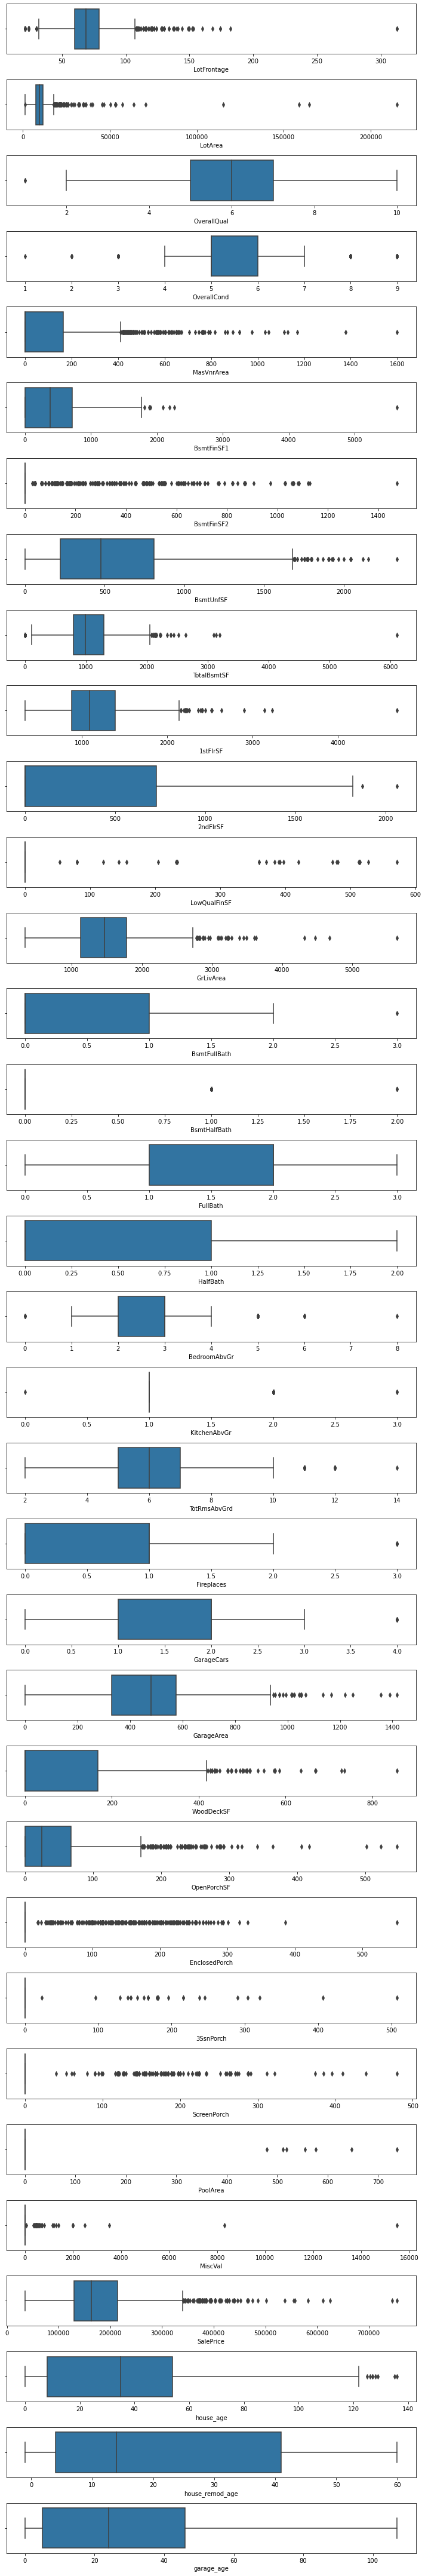

In [59]:
## check the outliers in all the numerical columns
cols  =  house.select_dtypes(include=np.number).columns
size = len(cols)

fig, ax = plt.subplots(size, figsize=(10,60))

for i in range(size):
   sns.boxplot(house[cols[i]],ax=ax[i])
    
plt.tight_layout()
plt.show()

In [60]:
## check the outliers in LotFrontage column
house[house['LotFrontage']>200]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
934       SC_20       RL        313.0    27650   Pave      IR2         HLS   
1298      SC_60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
934     AllPub    Inside       Mod        NAmes       PosA       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
934      1Fam     1Story            7            7      Flat  Tar&Grv   
1298     1Fam     2Story           10            5       Hip  ClyTile   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
934      Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1298      Stucco      Stucco      Stone       796.0        Ex        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
934      CBlock       Gd       TA           Gd          GLQ         425   
1298      PConc       Ex       TA           Gd          GLQ        5644   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
934           Unf           0        160          585    GasA        Ex   
1298          Unf           0        466         6110    GasA        Ex   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
934           Y      SBrkr      2069         0             0       2069   
1298          Y      SBrkr      4692       950             0       5642   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
934              1             0         2         0             4   
1298             2             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
934              1          Gd             9        Typ           1   
1298             1          Ex            12        Typ           3   

     FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
934           Gd     Attchd          RFn           2         505         TA   
1298          Gd     Attchd          Fin           2        1418         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
934          TA          Y           0            0              0          0   
1298         TA          Y         214          292              0          0   

      ScreenPorch  PoolArea  MiscVal SaleType SaleCondition  SalePrice  \
934             0         0        0       WD        Normal     242000   
1298            0       480        0      New       Partial     160000   

      house_age  house_remod_age  garage_age  
934          48                1        48.0  
1298          0                0         0.0

In [61]:
## check the outliers in LotArea column
house[house['LotArea']>100000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
249      SC_50       RL         69.0   159000   Pave      IR2         Low   
313      SC_20       RL        150.0   215245   Pave      IR3         Low   
335     SC_190       RL         69.0   164660   Grvl      IR1         HLS   
706      SC_20       RL         69.0   115149   Pave      IR2         Low   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
249    AllPub   CulDSac       Sev      ClearCr       Norm       Norm     1Fam   
313    AllPub    Inside       Sev       Timber       Norm       Norm     1Fam   
335    AllPub    Corner       Sev       Timber       Norm       Norm   2fmCon   
706    AllPub   CulDSac       Sev      ClearCr       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
249     1.5Fin            6            7     Gable  CompShg     Wd Sdng   
313     1Story            7            5       Hip  CompShg     BrkFace   
335     1.5Fin            5            6     Gable  CompShg     Plywood   
706     1Story            7            5     Gable  CompShg     Plywood   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
249     HdBoard     BrkCmn       472.0        Gd        TA     CBlock   
313     BrkFace       None         0.0        TA        TA     CBlock   
335     Plywood       None         0.0        TA        TA     CBlock   
706     Plywood      Stone       351.0        TA        TA     CBlock   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
249       Gd       TA           Gd          Rec         697          Unf   
313       Gd       TA           Gd          ALQ        1236          Rec   
335       TA       TA           Gd          ALQ        1249          BLQ   
706       Gd       TA           Gd          GLQ        1219          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
249           0        747         1444    GasA        Gd          Y   
313         820         80         2136    GasW        TA          Y   
335         147        103         1499    GasA        Ex          Y   
706           0        424         1643    GasA        TA          Y   

    Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
249      SBrkr      1444       700             0       2144             0   
313      SBrkr      2036         0             0       2036             2   
335      SBrkr      1619       167             0       1786             2   
706      SBrkr      1824         0             0       1824             1   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
249             1         2         0             4             1          Gd   
313             0         2         0             3             1          TA   
335             0         2         0             3             1          TA   
706             0         2         0             2             1          Gd   

     TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
249             7        Typ           2          TA     Attchd          Fin   
313             8        Typ           2          Gd     Attchd          RFn   
335             7        Typ           2          Gd     Attchd          Fin   
706             5        Typ           2          TA     Attchd          Unf   

     GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
249           2         389         TA         TA          Y           0   
313           2         513         TA         TA          Y           0   
335           2         529         TA         TA          Y         670   
706           2         739         TA         TA          Y         380   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
249           98              0          0            0         0      500  

In [62]:
## check the outliers in BsmtFinSF1 column
house[house['BsmtFinSF1'] > 5000][['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
1298           0        466         6110

In [63]:
## check the outliers in  BsmtFinSF2 column
house[house['BsmtFinSF2'] > 1400][['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']]

BsmtFinSF1  BsmtUnfSF  TotalBsmtSF
322          28          0         1502

In [64]:
## check the outliers in  BsmtUnfSF column
house[house['BsmtUnfSF'] > 2000][['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']]

BsmtFinSF1  BsmtUnfSF  TotalBsmtSF
224           56       2336         2392
278            0       2121         2121
477            0       2153         2153
581            0       2042         2042
678            0       2046         2046
1267           0       2002         2002

In [65]:
## check the outliers in MasVnrArea column
house[house['MasVnrArea'] > 1500]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
297      SC_60       FV         66.0     7399   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
297    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
297     2Story            7            5       Hip  CompShg     VinylSd   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
297     VinylSd    BrkFace      1600.0        Gd        TA      PConc   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
297       Gd       TA           No          BLQ         649          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
297           0        326          975    GasA        Ex          Y   

    Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
297      SBrkr       975       975             0       1950             0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
297             0         2         1             3             1          Gd   

     TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
297             7        Typ           1          TA     Detchd          RFn   

     GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
297           2         576         TA         TA          Y           0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
297           10              0          0          198         0        0   

    SaleType SaleCondition  SalePrice  house_age  house_remod_age  garage_age  
297       WD        Normal     239000         10                9        10.0

In [66]:
## check the outliers in 1stFlrSF column
house[house['1stFlrSF'] > 4000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1298      SC_60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
1298     1Fam     2Story           10            5       Hip  ClyTile   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
1298      Stucco      Stucco      Stone       796.0        Ex        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
1298      PConc       Ex       TA           Gd          GLQ        5644   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
1298          Unf           0        466         6110    GasA        Ex   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1298          Y      SBrkr      4692       950             0       5642   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1298             2             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
1298             1          Ex            12        Typ           3   

     FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
1298          Gd     Attchd          Fin           2        1418         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1298         TA          Y         214          292              0          0   

      ScreenPorch  PoolArea  MiscVal SaleType SaleCondition  SalePrice  \
1298            0       480        0      New       Partial     160000   

      house_age  house_remod_age  garage_age  
1298          0                0         0.0

In [67]:
## check the outliers in 2ndFlrSF column
house[house['2ndFlrSF'] > 1800]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
304       SC_75       RM         87.0    18386   Pave      Reg         Lvl   
691       SC_60       RL        104.0    21535   Pave      IR1         Lvl   
1182      SC_60       RL        160.0    15623   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
304     AllPub    Inside       Gtl      OldTown       Norm       Norm   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
304      1Fam     2.5Fin            7            9     Gable  CompShg   
691      1Fam     2Story           10            6     Gable  WdShngl   
1182     1Fam     2Story           10            5       Hip  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
304      CemntBd     CmentBd       None         0.0        TA        TA   
691      HdBoard     HdBoard    BrkFace      1170.0        Ex        TA   
1182     Wd Sdng     ImStucc       None         0.0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
304      BrkTil       TA       TA           No          Unf           0   
691       PConc       Ex       TA           Gd          GLQ        1455   
1182      PConc       Ex       TA           Av          GLQ        2096   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
304           Unf           0       1470         1470    GasA        Ex   
691           Unf           0        989         2444    GasA        Ex   
1182          Unf           0        300         2396    GasA        Ex   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
304           Y      SBrkr      1675      1818             0       3493   
691           Y      SBrkr      2444      1872             0       4316   
1182          Y      SBrkr      2411      2065             0       4476   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
304              0             0         3         0             3   
691              0             1         3         1             4   
1182             1             0         3         1             4   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
304              1          Gd            10        Typ           1   
691              1          Ex            10        Typ           2   
1182             1          Ex            10        Typ           2   

     FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
304           Ex     Attchd          Unf           3         870         TA   
691           Ex     Attchd          Fin           3         832         TA   
1182          TA     Attchd          Fin           3         813         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
304          TA          Y         302            0              0          0   
691          TA          Y         382           50              0          0   
1182         TA          Y         171           78              0          0   

      ScreenPorch  PoolArea  MiscVal SaleType SaleCondition  SalePrice  \
304             0         0        0       WD        Normal     295000   
691             0         0        0       WD        Normal     755000   
1182            0       555        0       WD       Abnorml     745000   

      house_age  house_remod_age  garage_age  
304         128                6         5.0  
691          13               12        13.0  
1182         11               11        11.0

In [68]:
## check the outliers in GrLivArea column
house[house['GrLivArea'] > 4000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
523       SC_60       RL        130.0    40094   Pave      IR1         Bnk   
691       SC_60       RL        104.0    21535   Pave      IR1         Lvl   
1182      SC_60       RL        160.0    15623   Pave      IR1         Lvl   
1298      SC_60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
523      1Fam     2Story           10            5       Hip  CompShg   
691      1Fam     2Story           10            6     Gable  WdShngl   
1182     1Fam     2Story           10            5       Hip  CompShg   
1298     1Fam     2Story           10            5       Hip  ClyTile   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
523      CemntBd     CmentBd      Stone       762.0        Ex        TA   
691      HdBoard     HdBoard    BrkFace      1170.0        Ex        TA   
1182     Wd Sdng     ImStucc       None         0.0        Gd        TA   
1298      Stucco      Stucco      Stone       796.0        Ex        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
523       PConc       Ex       TA           Gd          GLQ        2260   
691       PConc       Ex       TA           Gd          GLQ        1455   
1182      PConc       Ex       TA           Av          GLQ        2096   
1298      PConc       Ex       TA           Gd          GLQ        5644   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
523           Unf           0        878         3138    GasA        Ex   
691           Unf           0        989         2444    GasA        Ex   
1182          Unf           0        300         2396    GasA        Ex   
1298          Unf           0        466         6110    GasA        Ex   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
523           Y      SBrkr      3138      1538             0       4676   
691           Y      SBrkr      2444      1872             0       4316   
1182          Y      SBrkr      2411      2065             0       4476   
1298          Y      SBrkr      4692       950             0       5642   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
523              1             0         3         1             3   
691              0             1         3         1             4   
1182             1             0         3         1             4   
1298             2             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
523              1          Ex            11        Typ           1   
691              1          Ex            10        Typ           2   
1182             1          Ex            10        Typ           2   
1298             1          Ex            12        Typ           3   

     FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
523           Gd    BuiltIn          Fin           3         884         TA   
691           Ex     Attchd          Fin           3         832         TA   
1182          TA     Attchd          Fin           3         813         TA   
1298          Gd     Attchd          Fin           2        1418         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
523          TA          Y         208          406              0          0   
691          TA          Y         382           50              0          0   
1182         TA          Y      

There are some outliers in some of the above columns.  They will be handled with the scaling to be done later

In [69]:
## check the shape of the dataframe
house.shape

(1457, 74)

In [70]:
##  check all the categorical columns to see if there are any invalid values
cols  =  house.select_dtypes(exclude=np.number).columns
size = len(cols)

for i in range(size):
   print(house[cols[i]].value_counts())
   print(" ")

SC_20     535
SC_60     298
SC_50     144
SC_120     87
SC_30      69
SC_160     63
SC_70      60
SC_80      57
SC_90      52
SC_190     30
SC_85      20
SC_75      16
SC_45      12
SC_180     10
SC_40       4
Name: MSSubClass, dtype: int64
 
RL         1148
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
 
Pave    1451
Grvl       6
Name: Street, dtype: int64
 
Reg    924
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
 
Lvl    1308
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
 
AllPub    1456
NoSeWa       1
Name: Utilities, dtype: int64
 
Inside     1049
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
 
Gtl    1379
Mod      65
Sev      13
Name: LandSlope, dtype: int64
 
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     

#### No invalid data observed in the categorical variables

In [71]:
## write the cleaned dataframe to a csv file
house.to_csv('house_clean.csv', index=False)

## Data visualization

Visualize the data to understand the patterns in the dataset

In [72]:
## read the cleaned dataset
house = pd.read_csv('house_clean.csv')

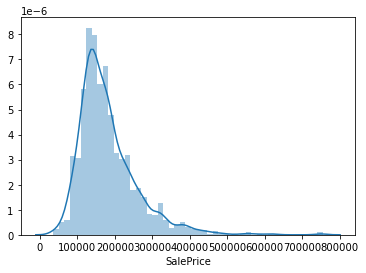

In [73]:
## check the distribution of the target column
sns.distplot(house['SalePrice'])

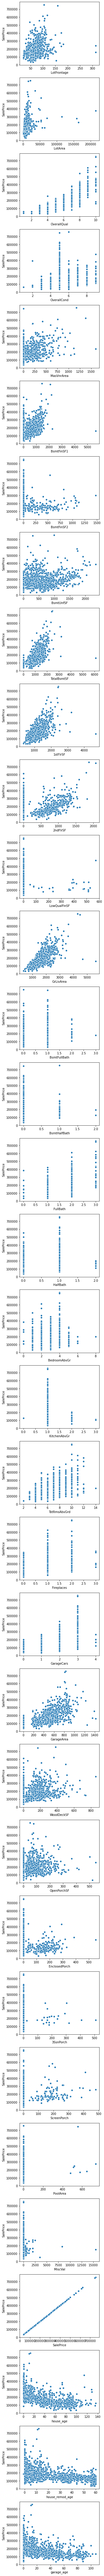

In [74]:
##  draw scatter plots between SalePrice and all other numeric columns to understand the relationship
cols  = house.select_dtypes(include=np.number).columns
size = len(cols)

fig, ax =  plt.subplots(size, figsize=(5,120))

for i in range(size):
    sns.scatterplot(x=house[cols[i]],y=house['SalePrice'],ax=ax[i])

plt.tight_layout()
plt.show()

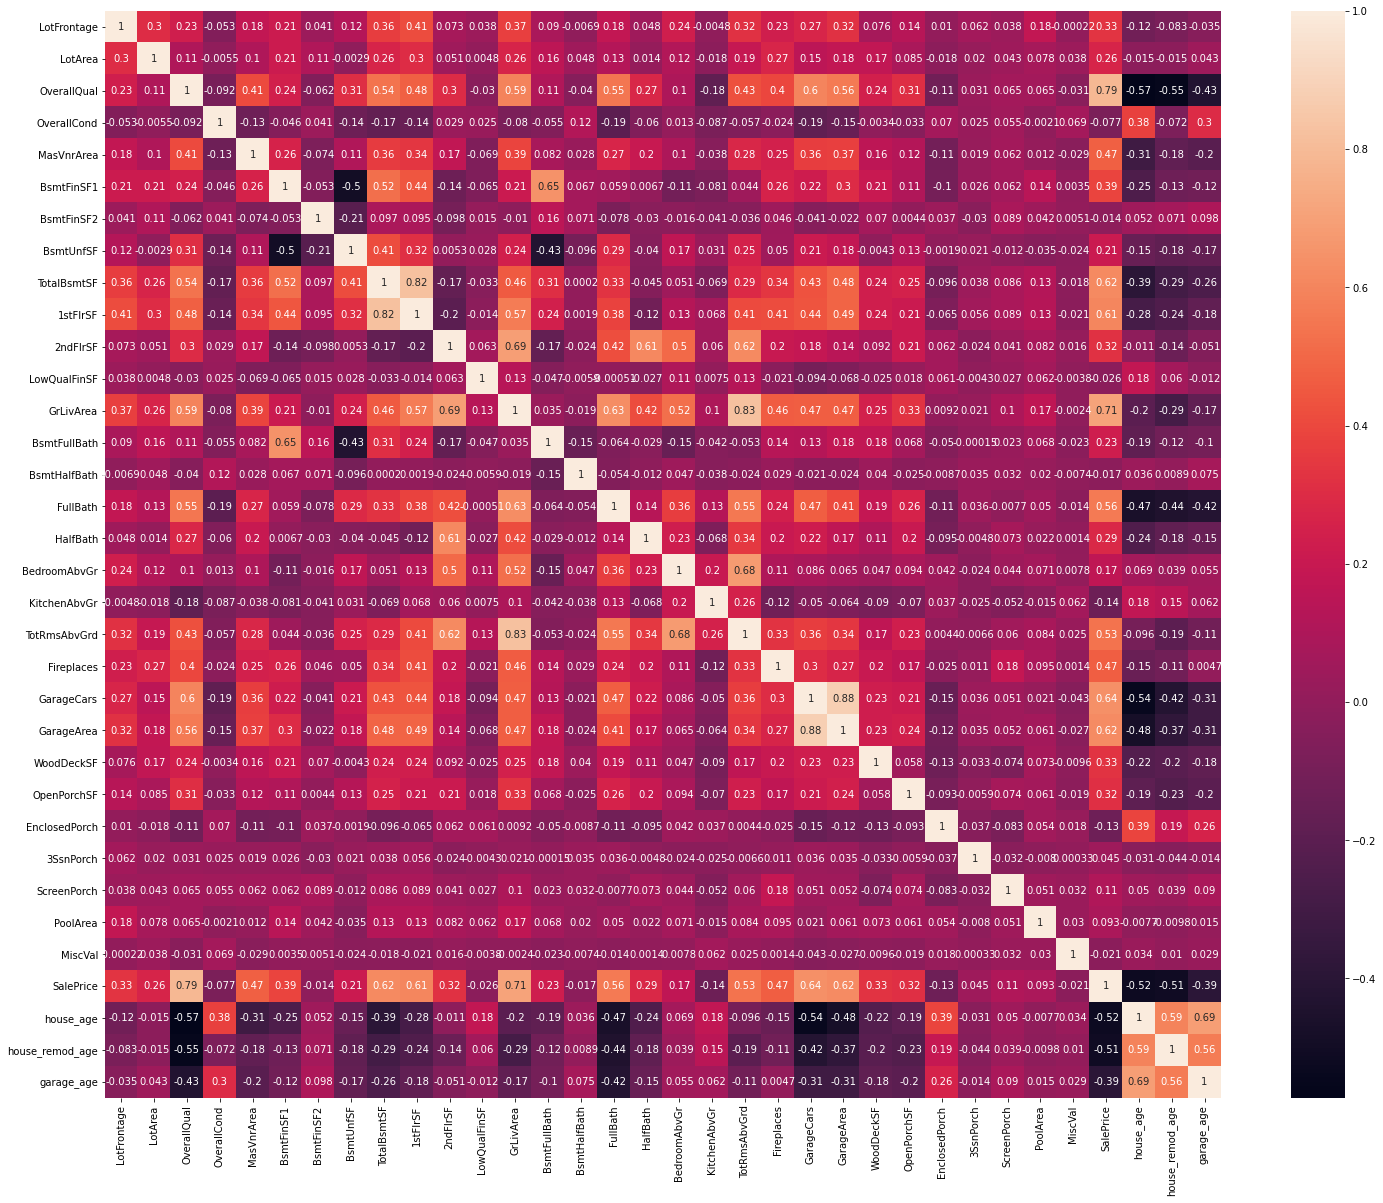

In [75]:
## plot a heatmap to know the correlation between SalePrice and numerical columns
plt.figure(figsize=(25,20))
sns.heatmap(house.select_dtypes(include=np.number).corr(),annot=True)

### Observation

#### TotalBsmtSF, 1stFlSF, GrLivArea, GarageCars, GarageArea, FullBath, seem to have high positive correlation with SalePrice
#### house_age, house_remod_age seem to have high negative correlation with SalePrice

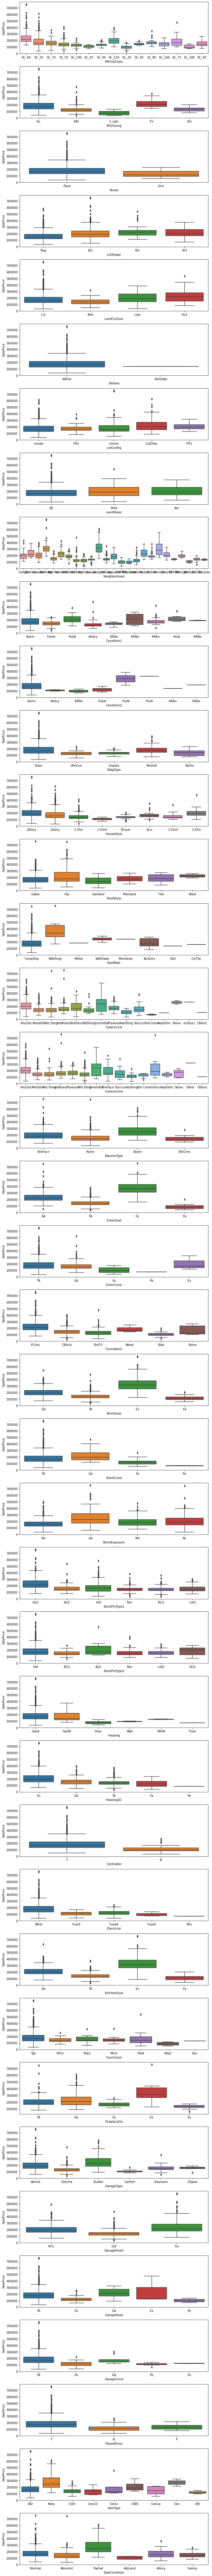

In [76]:
## plot all the categorical columns against SalePrice to understand the relationship
cols  = house.select_dtypes(exclude=np.number).columns
size = len(cols)

fig, ax =  plt.subplots(size, figsize=(10,120))

for i in range(size):
    sns.boxplot(x=house[cols[i]],y=house['SalePrice'],ax=ax[i])

plt.tight_layout()
plt.show()

### Observation:
#### MSSubClass, MSZoning,Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual,  Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, Heating, HeatingQC, CentralAir, KitchenQual, FireplaceQu, GarageType, SaleType, SaleCondition seem to affect the SalePrice

##  Data Preparation

Prepare the data to be used for Data Modeling

In [77]:
## read the cleaned data set
house = pd.read_csv('house_clean.csv')

In [78]:
## store all the columns as a list
all_cols = list(house.columns)

In [79]:
## store all the numerical columns in a list
num_cols = list(house.select_dtypes(include=np.number).columns)

In [80]:
## store all the categorical columns in a list
char_cols  = list(house.select_dtypes(exclude=np.number).columns)

In [81]:
## create dummy variables for all the categorical variables
house = pd.concat((house,pd.get_dummies(house[char_cols],drop_first=True)),axis=1)

In [82]:
## drop all the categorical columns for which dummy variables have been created
house.drop(columns=char_cols,inplace=True)
house.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  house_age  house_remod_age  garage_age  MSSubClass_SC_160  \
0     208500          5                5         5.0                  0   
1     181500         31               31        31.0                  0   
2     223500          7                6         7.0                  0   
3     140000         91               36         8.0                  0   
4     250000          8                8         8.0                  0   

   MSSubClass_SC_180  MSSubClass_SC_190  MSSubClass_SC_20  MSSubClass_SC_30  \
0                  0                  0                 0                 0   
1                  0                  0                 1                 0   
2                  0                  0                 0                 0   
3                  0                  0                 0                 0   
4                  0                  0                 0                 0   

   MSSubClass_SC_40  MSSubClass_SC_45  MSSubClass_SC_50  MSSubClass_SC_60  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 0   
2                 0                 0                 0                 1   
3                 0                 0                 0                 0   
4                 0                 0                 0                 1   

   MSSubClass_SC_70  MSSubClass_SC_75  MSSubClass_SC_80  MSSubClass_SC_85  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0 

In [83]:
## check the dataframe columns
house.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

## Train Test split

Split the data into Train and Test datasets

In [84]:
## import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [85]:
## create a copy of the house dataframe
house_new = house.copy()

In [86]:
## Split the target and explanatory varibles
house_y =  house_new.pop('SalePrice')
house_X =  house_new

In [87]:
## create the Train and Test datasets 
X_train, X_test, y_train, y_test =  train_test_split(house_X, house_y, train_size=0.7, random_state=100)

In [88]:
## check the shape of the train dataset
X_train.shape

(1019, 247)

In [89]:
## check the shape of the test dataset
X_test.shape

(438, 247)

In [90]:
## remove the SalePrice from the number columns ie. numeric columns from the original dataset excluding the dummy variables
num_cols.remove('SalePrice')
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'house_age',
 'house_remod_age',
 'garage_age']

In [91]:
## Use a standard scaler to the scale the numerical columns
scaler  = RobustScaler()

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [92]:
## display the scaled training data set
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
342    -0.315789 -0.126803          1.5          0.0    3.802469   -0.498955   
114    -0.421053 -0.529233          0.0          3.0    0.000000    0.540767   
695    -1.000000 -0.847887         -0.5          2.0    0.000000    0.320557   
365     0.000000  0.037965          0.0          0.0    1.524691    0.310801   
308     0.000000  0.757277         -1.0          0.0    0.000000   -0.172822   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
342         0.0   1.951626     1.356863  1.188976   0.00000           0.0   
114       150.0  -0.637198     0.070588  0.700787   1.21512           0.0   
695         0.0  -0.810676    -0.737255 -0.913386   0.00000           0.0   
365         0.0   0.498749     0.788235  0.618110   0.00000           0.0   
308         0.0   0.188490    -0.256863 -0.431102   0.00000           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
342   0.366436           0.0           0.0       0.0       0.0          -1.0   
114   1.345651           1.0           0.0       0.0       1.0           0.0   
695  -1.277906           0.0           0.0      -1.0       0.0          -1.0   
365  -0.080062           1.0           0.0      -1.0       1.0           0.0   
308  -0.900693           0.0           0.0      -1.0       0.0          -2.0   

     KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
342           0.0           0.0         0.0         0.0    0.358333   
114           0.0           1.5         0.0        -1.0   -1.241667   
695           0.0          -1.0        -1.0        -1.0   -1.137500   
365           0.0           0.0         1.0         0.0    0.150000   
308           0.0          -1.0        -1.0         0.0    0.254167   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
342    2.964072     0.700730            0.0        0.0          0.0       0.0   
114    1.341317    -0.350365            0.0        0.0          0.0       0.0   
695    0.000000    -0.350365          129.0        0.0          0.0       0.0   
365    0.000000     0.759124            0.0        0.0        185.0       0.0   
308    0.946108    -0.350365            0.0        0.0          0.0       0.0   

     MiscVal  house_age  house_remod_age  garage_age  MSSubClass_SC_160  \
342      0.0  -0.659574        -0.289474   -0.452381                  0   
114      0.0   0.595745        -0.236842    0.952381                  0   
695      0.0   1.085106         1.105263    1.500000                  0   
365      0.0   0.255319         0.842105    0.571429                  0   
308      0.0   0.744681         1.184211    0.619048                  0   

     MSSubClass_SC_180  MSSubClass_SC_190  MSSubClass_SC_20  MSSubClass_SC_30  \
342                  0                  0                 0                 0   
114                  0                  0                 0                 0   
695                  0                  0                 0                 1   
365                  0                  0                 1                 0   
308                  0                  0                 0                 1   

     MSSubClass_SC_40  MSSubClass_SC_45  MSSubClass_SC_50  MSSubClass_SC_60  \
342                 0                 0                 0                 0   
114                 0                 0                 0                 0   
695                 0                 0                 0                 0   
365                 0                 0                 0                 0   
308                 0                 0                 0                 0   

     MSSubClass_SC_70  MSSubClass_SC_75  MSSubClass_SC_80  MSSubClass_SC_85  \
342                 0                 0                 0                 0   
114                 1                 0                 0                 0   
695             

In [93]:
## scale the Test dataset 
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [94]:
## display the scaled test dataset
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1229     0.052632 -0.410529         -0.5          1.0    0.740741    0.581185   
791      1.210526  0.144267          0.5          0.0    0.000000    0.663415   
118      1.105263  0.765882          0.5          0.0    0.000000    1.510801   
982      0.315789  0.196153         -0.5          0.0    0.000000   -0.537979   
139     -0.210526  1.537839          0.0          0.0    0.000000    0.606272   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1229         0.0  -0.305254     0.223529  0.216535  0.000000           0.0   
791          0.0  -0.385321     0.245098  0.092520  1.217869           0.0   
118          0.0  -0.472060     1.335294  1.218504  2.093471           0.0   
982          0.0  -0.810676    -1.945098  0.437008  0.593814           0.0   
139          0.0  -0.632193    -0.125490 -0.299213  1.149141           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1229  -0.394149           1.0           0.0      -1.0       0.0           0.0   
791    0.872979           1.0           0.0       0.0       1.0           0.0   
118    2.734411           1.0           0.0       1.0       0.0           2.0   
982    0.443418           0.0           0.0       0.0       0.0           1.0   
139    0.489607           1.0           0.0       0.0       1.0           0.0   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
1229           0.0           0.0        -1.0         0.0    0.258333   
791            0.0           1.0         0.0         0.0   -0.095833   
118            0.0           2.5         1.0         1.0    0.483333   
982            1.0           1.0        -1.0         0.0    0.254167   
139            0.0           0.5        -1.0         0.0   -0.033333   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1229    0.000000    -0.087591            0.0        0.0          0.0   
791     1.077844     1.547445            0.0        0.0          0.0   
118     2.197605    -0.350365            0.0        0.0          0.0   
982     0.000000    -0.350365            0.0        0.0          0.0   
139     1.652695     1.094891            0.0        0.0          0.0   

      PoolArea  MiscVal  house_age  house_remod_age  garage_age  \
1229       0.0      0.0   0.212766         0.789474    0.523810   
791        0.0      0.0  -0.489362        -0.105263   -0.285714   
118        0.0      0.0  -0.297872         0.157895   -0.047619   
982        0.0      0.0  -0.042553         0.473684    0.238095   
139        0.0      0.0  -0.468085        -0.052632   -0.238095   

      MSSubClass_SC_160  MSSubClass_SC_180  MSSubClass_SC_190  \
1229                  0                  0                  0   
791                   0                  0                  0   
118                   0                  0                  0   
982                   0                  0                  0   
139                   0                  0                  0   

      MSSubClass_SC_20  MSSubClass_SC_30  MSSubClass_SC_40  MSSubClass_SC_45  \
1229                 0                 0                 0                 0   
791                  0                 0                 0                 0   
118                  0                 0                 0                 0   
982                  0                 0                 0                 0   
139                  0                 0                 0                 0   

      MSSubClass_SC_50  MSSubClass_SC_60  MSSubClass_SC_70  MSSubClass_SC_75  \
1229                 0                 0                 0                 0   
791                  0                 1                 0                 0   
118                  0                 1                 0                 0   
982                  0                 0                 0                 0   
139                  0

## Model Building

In [95]:
# import the modules requiredf for model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score

### Lasso

Create a model using Lasso regulariztion technique

In [96]:
# import the required modules and functions
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [97]:
##  create the list of alphas to tune and run GridsearchCV to find the optimum alpha

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso=Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.126831      0.018417         0.001980        0.001869      0.0001   
1       0.115366      0.011216         0.008244        0.006325       0.001   
2       0.136573      0.020194         0.003192        0.002130        0.01   
3       0.123715      0.012075         0.005522        0.005098        0.05   
4       0.120855      0.012953         0.004122        0.006065         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20090.260710      -24469.730341      -21840.565882   
1   {'alpha': 0.001}      -20085.835838      -24469.385405      -21840.245749   
2    {'alpha': 0.01}      -20047.619664      -24465.934407      -21837.083064   
3    {'alpha': 0.05}      -20026.551308      -24450.572398      -21822.988129   
4     {'alpha': 0.1}      -19999.473182      -24432.982520      -21805.496197   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -22803.146696      -18886.905911    -21618.121908     1968.722245   
1      -22801.945330      -18887.644149    -21617.011294     1968.953207   
2      -22789.944980      -18894.994661    -21607.115355     1970.403152   
3      -22771.470994      -18915.393874    -21597.395340     1961.155165   
4      -22749.046856      -18914.287302    -21580.257211     1957.606560   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -11870.374100       -12235.721345   
1               27       -11870.361427       -12235.710716   
2               26       -11870.296110       -12235.690901   
3               25       -11870.188068       -12235.601005   
4               24       -11870.046340       -12235.466819   

   split2_train_score  split3_train_score  split4_train_score  \
0       -12842.944810       -12872.998153       -12671.838982   
1       -12842.937654       -12873.016804       -12671.833751   
2       -12842.998314       -12873.343628       -12671.942574   
3       -12843.307030       -12875.240094       -12672.704133   
4       -12843.689837       -12877.562548       -12673.886112   

   mean_train_score  std_train_score  
0     -12498.775478       387.951514  
1     -12498.772070       387.958922  
2     -12498.854306       388.066304  
3     -12499.408066       388.602550  
4     -12500.130331       389.289582

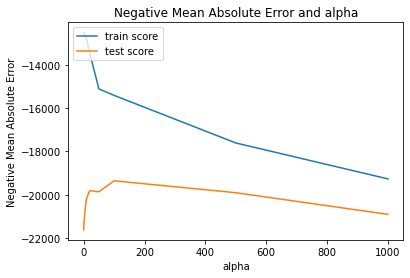

In [99]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [100]:
# display the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest neg MAE is -19353.067667859606 at alpha = 100


In [101]:
## use the best hyperparameter value and create a model using Lasso
alpha = best_alpha

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train) 

Lasso(alpha=100)

In [102]:
## display the features and the coefficient values that are non-zero
coef_list = pd.DataFrame(list(zip(X_train.columns,lasso1.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
100       Condition2_PosN -99167.105953  99167.105953
126      RoofMatl_WdShngl  72033.215085  72033.215085
79   Neighborhood_NoRidge  56604.549568  56604.549568
86   Neighborhood_StoneBr  40008.335015  40008.335015
80   Neighborhood_NridgHt  33583.298793  33583.298793
205        KitchenQual_Gd -27329.072365  27329.072365
206        KitchenQual_TA -26453.638834  26453.638834
12              GrLivArea  24955.950735  24955.950735
152    Exterior2nd_Stucco -22566.132774  22566.132774
18           KitchenAbvGr -20081.934202  20081.934202
2             OverallQual  19836.535779  19836.535779
204        KitchenQual_Fa -19747.071554  19747.071554
106        BldgType_Twnhs -18974.250270  18974.250270
147   Exterior2nd_ImStucc  18901.079639  18901.079639
70   Neighborhood_Crawfor  18623.051619  18623.051619
177       BsmtExposure_Gd  18055.463496  18055.463496
107       BldgType_TwnhsE -17076.695460  17076.695460
120      RoofMatl_CompShg  16691.718788  16691.718788
172           BsmtQual_Gd -16555.815841  16555.815841
71   Neighborhood_Edwards -14516.878072  14516.878072
57        LandContour_Lvl  14508.232829  14508.232829
55        LandContour_HLS  14121.456314  14121.456314
161          ExterQual_TA -13429.342951  13429.342951
129   Exterior1st_BrkFace  13155.814832  13155.814832
160          ExterQual_Gd -12572.152745  12572.152745
239          SaleType_New  12344.164341  12344.164341
85   Neighborhood_Somerst  12334.245518  12334.245518
173           BsmtQual_TA -12228.514166  12228.514166
21             GarageCars  12177.225700  12177.225700
10               2ndFlrSF  11895.994312  11895.994312
53           LotShape_IR3 -11257.698384  11257.698384
90        Condition1_Norm   9572.511126   9572.511126
212        Functional_Typ   9238.780524   9238.780524
112     HouseStyle_2Story  -9000.295069   9000.295069
63          LandSlope_Mod   8949.224794   8949.224794
30              house_age  -8917.726394   8917.726394
109     HouseStyle_1Story   8664.221663   8664.221663
59      LotConfig_CulDSac   8588.091169   8588.091169
181      BsmtFinType1_GLQ   7387.180399   7387.180399
19           TotRmsAbvGrd   7137.192634   7137.192634
13           BsmtFullBath   7040.428699   7040.428699
81   Neighborhood_OldTown  -7014.259985   7014.259985
75   Neighborhood_Mitchel  -6980.616730   6980.616730
51            Street_Pave   6825.709896   6825.709896
189      BsmtFinType2_Unf   6603.155160   6603.155160
15               FullBath   6562.885914   6562.885914
167      Foundation_PConc   6462.868842   6462.868842
223      GarageFinish_Unf  -6417.558312   6417.558312
36       MSSubClass_SC_20   6345.741500   6345.741500
166     Foundation_CBlock   5920.913678   5920.913678
76     Neighborhood_NAmes  -5884.422365   5884.422365
222      GarageFinish_RFn  -5871.680860   5871.680860
3             OverallCond   5505.200726   5505.200726
47            MSZoning_FV   5257.846064   5257.846064
72   Neighborhood_Gilbert  -5232.505401   5232.505401
78    Neighborhood_NWAmes  -4932.040267   4932.040267
156    MasVnrType_BrkFace  -4612.875997   4612.875997
155   Exterior2nd_Wd Shng  -4465.162946   4465.162946
224         GarageQual_Fa  -4459.990980   4459.990980
20             Fireplaces   4171.891618   4171.891618
179       BsmtExposure_No  -4171.747774   4171.747774
49            MSZoning_RL   4169.301157   4169.301157
184      BsmtFinType1_Unf  -4090.644616   4090.644616
245  SaleCondition_Normal   4065.018371   4065.018371
16               HalfBath   3585.286521   3585.286521
60          LotConfig_FR2  -3542.072487   3542.072487
89       Condition1_Feedr  -3470.627318   3470.627318
83    Neighborhood_Sawyer  -3435.417643   3435.417643
31        house_remod_age  -3256.013267   3256.013267
52           LotShape_IR2   3144.916727   3144.916727
198          HeatingQC_TA  -3120.096751   3120.096751
132   Exterior1st_HdBoard  -2933.962407   2933.962407
17           BedroomAbvGr  -2897.294388   2897.294388
108     HouseStyle_1.5

In [103]:
coef_list.to_csv('lasso1.csv')

In [104]:
## get the shape of the coefficient list

coef_list.shape

(114, 3)

In [105]:
## predict using the Lasso model
y_train_pred = lasso1.predict(X_train)
y_test_pred = lasso1.predict(X_test)

In [106]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8966964151206904
Test r2 score: 0.8857152496741189


The train and Test r2 scores are very close to each other implying a good model

### Lasso with RFE

Create a model using Ridge and RFE. Select the features using RFE and then use in the Ridge regression

In [107]:
## create hyperparameter list of n_features_to_select and run GridSearchCV to select the optimal parameter

# list of alphas to tune
params = {'n_features_to_select': [30,50,80,100, 120,150,180]} 

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr)

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   15.1s finished


GridSearchCV(cv=5, estimator=RFE(estimator=Ridge()),
             param_grid={'n_features_to_select': [30, 50, 80, 100, 120, 150,
                                                  180]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.519707      0.022863         0.001590        0.002325   
1       0.497264      0.043089         0.003391        0.002792   
2       0.487297      0.022663         0.003528        0.006108   
3       0.445966      0.010432         0.000399        0.000798   
4       0.404914      0.035785         0.000798        0.001596   
5       0.344045      0.022590         0.007644        0.006994   
6       0.264390      0.010972         0.008641        0.005732   

  param_n_features_to_select                         params  \
0                         30   {'n_features_to_select': 30}   
1                         50   {'n_features_to_select': 50}   
2                         80   {'n_features_to_select': 80}   
3                        100  {'n_features_to_select': 100}   
4                        120  {'n_features_to_select': 120}   
5                        150  {'n_features_to_select': 150}   
6                        180  {'n_features_to_select': 180}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0      -25949.919735      -22314.022682      -22300.678997      -23894.975945   
1      -24077.169302      -20910.119802      -20785.910363      -23014.175705   
2      -21152.354295      -21436.139446      -19175.853125      -21408.719218   
3      -21041.464954      -21328.539921      -19535.408048      -21503.361773   
4      -21094.133740      -21271.909467      -19194.340545      -20708.400502   
5      -21284.400383      -20948.946242      -18734.360759      -20200.379177   
6      -21390.617860      -20939.723512      -18795.574892      -20418.924955   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0      -24089.059132    -23709.731298     1351.301620                7   
1      -23534.772451    -22464.429525     1362.504291                6   
2      -22145.796349    -21063.772487     1000.050728                5   
3      -21819.270249    -21045.608989      796.098402                4   
4      -21654.964609    -20784.749773      851.533627                3   
5      -20891.271764    -20411.871665      909.763907                1   
6      -21250.080351    -20558.984314      942.700360                2   

   split0_train_score  split1_train_score  split2_train_score  \
0       -21085.653392       -22096.908268       -22296.884583   
1       -18860.758325       -19830.483612       -20266.094540   
2       -16086.833168       -17098.666840       -17145.310961   
3       -15564.280088       -16571.099743       -16841.638886   
4       -15417.494776       -16293.636816       -16543.225351   
5       -14718.321724       -15757.697517       -16161.274910   
6       -14686.572741       -15751.652121       -15915.424447   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -19670.191617       -20960.356105     -21221.998793       939.787053  
1       -17346.259144       -19088.597897     -19078.438704      1002.400311  
2       -15131.631124       -16943.907334     -16481.269886       776.307680  
3       -14790.432246       -16614.117237     -16076.313640       779.158270  
4       -14036.522459       -16146.487263     -15687.473333       906.528177  
5       -13771.548411       -15497.804085     -15181.329330       847.880673  
6       -13610.372733       -15465.586259     -15085.921660       849.957802

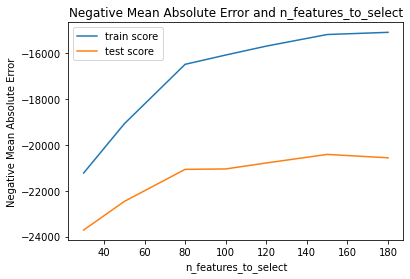

In [109]:
# plotting mean test and train scores with n_features_to_select
cv_results['param_n_features_to_select'] = cv_results['param_n_features_to_select'].astype('float32')

# plotting
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.xlabel('n_features_to_select')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and n_features_to_select")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
# show the best score and best hyperparameter value
best_score = model_cv.best_score_
best_features_to_select = model_cv.best_params_['n_features_to_select']

print(" The highest test neg MAE is {0} at n_features_to_select = {1}".format(best_score, best_features_to_select))

 The highest test neg MAE is -20411.871665190363 at n_features_to_select = 150


As per RFE using 120 features has the least error on the test dataset.  For model comparsion we will create Lasso models using 120 features, 60 featueres and 30 features and compare the R2 score

####  Build model using the Best RFE score - 150 features

In [111]:
# run RFE using the best hyperparameter value determined
n_features = best_features_to_select

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=150)

In [112]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', False, 40),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 47),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 32),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 90),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 26),
 ('WoodDeckSF', False, 65),
 ('OpenPorchSF', False, 79),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 85),
 ('PoolArea', False, 92),
 ('MiscVal', False, 91),
 ('house_age', True, 1),
 ('house_remod_age', False, 19),
 ('garage_age', True, 1),
 ('MSSubClass_SC_160', False, 82),
 ('MSSubClass_SC_180', True, 1),
 ('MSSubClass_SC_190', False, 15),
 ('

In [113]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageCond_Po', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=150)

In [114]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.083312      0.008818         0.001595        0.000798      0.0001   
1       0.074989      0.015301         0.003117        0.006235       0.001   
2       0.095976      0.020877         0.000000        0.000000        0.01   
3       0.059357      0.011702         0.003128        0.006255        0.05   
4       0.074987      0.026872         0.006249        0.007653         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19497.412768      -21694.997263      -19224.144981   
1   {'alpha': 0.001}      -19497.048699      -21694.844534      -19224.063696   
2    {'alpha': 0.01}      -19493.408011      -21693.305278      -19223.251320   
3    {'alpha': 0.05}      -19482.188053      -21686.471688      -19219.640762   
4     {'alpha': 0.1}      -19494.494625      -21677.945496      -19215.127564   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -19966.523020      -18546.534199    -19785.922446     1059.443081   
1      -19967.617565      -18546.446793    -19786.004257     1059.474380   
2      -19977.474665      -18545.572734    -19786.602402     1059.757530   
3      -19981.991306      -18541.688030    -19782.395968     1059.388224   
4      -19986.932437      -18536.832178    -19782.266460     1057.454763   

   rank_test_score  split0_train_score  split1_train_score  \
0               25       -12967.124427       -13570.770824   
1               26       -12967.130809       -13570.775783   
2               27       -12967.194627       -13570.818025   
3               24       -12967.478267       -13571.006611   
4               23       -12967.832816       -13571.230790   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13746.792962       -13768.186382       -13293.654014   
1       -13746.803293       -13768.197296       -13293.676070   
2       -13746.906924       -13768.316241       -13293.896627   
3       -13747.367508       -13768.840768       -13294.876879   
4       -13747.943237       -13769.496360       -13296.102190   

   mean_train_score  std_train_score  
0     -13469.305722       303.204077  
1     -13469.316650       303.203782  
2     -13469.426489       303.202340  
3     -13469.914007       303.195329  
4     -13470.521079       303.186133

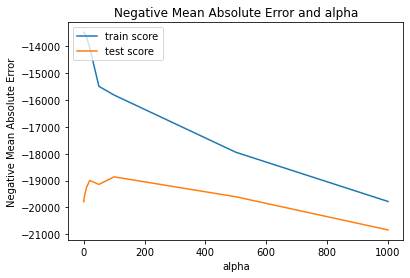

In [116]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [117]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -18861.17203774309 at alpha = 100


In [118]:
## run ridge using the best alpha 

alpha = best_alpha 

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train[col], y_train) 

Lasso(alpha=100)

In [119]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,lasso2.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
66        Condition2_PosN -92532.221416  92532.221416
86       RoofMatl_WdShngl  76251.060791  76251.060791
50   Neighborhood_NoRidge  57293.284820  57293.284820
56   Neighborhood_StoneBr  41838.381294  41838.381294
51   Neighborhood_NridgHt  33196.400630  33196.400630
124        KitchenQual_Gd -27182.003851  27182.003851
125        KitchenQual_TA -26825.425754  26825.425754
101    Exterior2nd_Stucco -26016.095622  26016.095622
6               GrLivArea  24680.718682  24680.718682
123        KitchenQual_Fa -24314.406340  24314.406340
12           KitchenAbvGr -22111.490509  22111.490509
115       BsmtExposure_Gd  21951.270543  21951.270543
69         BldgType_Twnhs -19900.779779  19900.779779
0             OverallQual  19500.982474  19500.982474
80       RoofMatl_CompShg  18895.710992  18895.710992
70        BldgType_TwnhsE -17332.461247  17332.461247
44   Neighborhood_Edwards -16100.550479  16100.550479
43   Neighborhood_Crawfor  15903.771500  15903.771500
113           BsmtQual_Gd -15877.244632  15877.244632
33        LandContour_HLS  15290.924591  15290.924591
88    Exterior1st_BrkFace  15286.178411  15286.178411
98    Exterior2nd_ImStucc  15176.329017  15176.329017
35        LandContour_Lvl  13909.767463  13909.767463
5                2ndFlrSF  13714.891972  13714.891972
146          SaleType_New  13301.149540  13301.149540
36      LotConfig_CulDSac  13143.912830  13143.912830
106          ExterQual_Gd -12580.253466  12580.253466
107          ExterQual_TA -12561.490974  12561.490974
114           BsmtQual_TA -12427.792687  12427.792687
58        Condition1_Norm  12220.695346  12220.695346
55   Neighborhood_Somerst  11219.172383  11219.172383
15             GarageCars  11082.803646  11082.803646
34        LandContour_Low  10293.165061  10293.165061
75      HouseStyle_2Story  -9796.499747   9796.499747
48     Neighborhood_NAmes  -9462.994287   9462.994287
16              house_age  -9461.937778   9461.937778
52   Neighborhood_OldTown  -9319.080972   9319.080972
7            BsmtFullBath   9055.219100   9055.219100
49    Neighborhood_NWAmes  -8816.252628   8816.252628
72      HouseStyle_1Story   8725.859486   8725.859486
129        Functional_Typ   8134.580674   8134.580674
39          LandSlope_Mod   8012.179315   8012.179315
47   Neighborhood_Mitchel  -7739.659165   7739.659165
9                FullBath   7486.387261   7486.387261
31           LotShape_IR2   7295.864289   7295.864289
13           TotRmsAbvGrd   7128.748677   7128.748677
26            MSZoning_FV   6926.750091   6926.750091
135      GarageFinish_Unf  -6716.754972   6716.754972
134      GarageFinish_RFn  -6563.061382   6563.061382
120          Heating_GasW   6550.632049   6550.632049
109      Foundation_PConc   6426.383638   6426.383638
45   Neighborhood_Gilbert  -6347.409037   6347.409037
14             Fireplaces   6270.969662   6270.969662
19       MSSubClass_SC_20   6233.820323   6233.820323
116      BsmtFinType1_GLQ   6150.698869   6150.698869
46    Neighborhood_IDOTRR  -6129.104054   6129.104054
1             OverallCond   5865.013504   5865.013504
108     Foundation_CBlock   5590.170722   5590.170722
54    Neighborhood_Sawyer  -5360.171450   5360.171450
71      HouseStyle_1.5Unf   5067.882951   5067.882951
104      MasVnrType_Stone   4887.224030   4887.224030
110       Foundation_Slab  -4777.584721   4777.584721
117      BsmtFinType1_Unf  -4564.062475   4564.062475
28            MSZoning_RL   4455.012497   4455.012497
10               HalfBath   4421.947490   4421.947490
105          ExterQual_Fa  -4417.229628   4417.229628
32           LotShape_IR3  -4262.536304   4262.536304
89    Exterior1st_CemntBd   4221.325125   4221.325125
90    Exterior1st_HdBoard  -3946.270452   3946.270452
11           BedroomAbvGr  -3742.517695   3742.517695
103   Exterior2nd_Wd Shng  -3624.817371   3624.817371
24       MSSubClass_SC_70   3561.511208   3561.511208
4             TotalBsmtSF   3496.473614   3496.473614
61        Condition1_R

In [120]:
## print the coef_list shape
coef_list.shape

(89, 3)

In [121]:
coef_list.to_csv('lasso2.csv')

In [122]:
## predict using Ridge model on the Train and test datasets
y_train_pred = lasso2.predict(X_train[col])
y_test_pred = lasso2.predict(X_test[col])

In [123]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.89266763034169
Test r2 score: 0.8824549117144426


######  Build model using the Best RFE score - 60 features

In [124]:
# run RFE using the best hyperparameter value determined
n_features = 60

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=60)

In [125]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 128),
 ('LotArea', False, 130),
 ('OverallQual', True, 1),
 ('OverallCond', False, 71),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', False, 74),
 ('BsmtFinSF2', False, 176),
 ('BsmtUnfSF', False, 75),
 ('TotalBsmtSF', False, 73),
 ('1stFlrSF', False, 122),
 ('2ndFlrSF', False, 21),
 ('LowQualFinSF', False, 180),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 86),
 ('FullBath', False, 65),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 90),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 77),
 ('Fireplaces', False, 79),
 ('GarageCars', False, 4),
 ('GarageArea', False, 116),
 ('WoodDeckSF', False, 155),
 ('OpenPorchSF', False, 169),
 ('EnclosedPorch', False, 178),
 ('3SsnPorch', False, 173),
 ('ScreenPorch', False, 175),
 ('PoolArea', False, 182),
 ('MiscVal', False, 181),
 ('house_age', False, 55),
 ('house_remod_age', False, 109),
 ('garage_age', False, 91),
 ('MSSubClass_SC_160', False, 172),
 ('MSSubClass_SC_180', Fal

In [126]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'KitchenAbvGr', 'MSZoning_FV',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRAn', 'Condition2_PosA', 'Condition2_PosN',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior2nd_AsphShn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Slab', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'Bsmt

In [127]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.038142      0.014217         0.003390        0.000798      0.0001   
1       0.036898      0.010557         0.005319        0.005355       0.001   
2       0.039817      0.017873         0.003131        0.006262        0.01   
3       0.035599      0.009489         0.007046        0.007151        0.05   
4       0.028164      0.018475         0.005115        0.005457         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21941.204422      -20196.440912      -19256.547413   
1   {'alpha': 0.001}      -21941.200114      -20196.426356      -19256.521648   
2    {'alpha': 0.01}      -21941.155548      -20196.294371      -19256.268261   
3    {'alpha': 0.05}      -21940.958129      -20195.701734      -19255.140199   
4     {'alpha': 0.1}      -21940.711359      -20194.957414      -19253.730123   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -23079.400290      -20698.584869    -21034.435581     1340.151297   
1      -23079.858921      -20698.565682    -21034.514544     1340.300305   
2      -23083.586800      -20698.373810    -21035.135758     1341.525742   
3      -23093.447155      -20697.521045    -21036.553652     1344.928792   
4      -23100.676025      -20696.455089    -21037.306002     1347.628324   

   rank_test_score  split0_train_score  split1_train_score  \
0               16       -17632.673969       -18331.611604   
1               17       -17632.678180       -18331.613976   
2               19       -17632.720784       -18331.639794   
3               22       -17632.909919       -18331.753612   
4               24       -17633.146318       -18331.896599   

   split2_train_score  split3_train_score  split4_train_score  \
0       -18543.436588       -17812.374946       -18217.609712   
1       -18543.442436       -17812.381685       -18217.614163   
2       -18543.502228       -17812.446140       -18217.658678   
3       -18543.767393       -17812.733914       -18217.856523   
4       -18544.098849       -17813.093633       -18218.103829   

   mean_train_score  std_train_score  
0     -18107.541364       336.139678  
1     -18107.546088       336.139430  
2     -18107.593525       336.137937  
3     -18107.804272       336.130870  
4     -18108.067846       336.122153

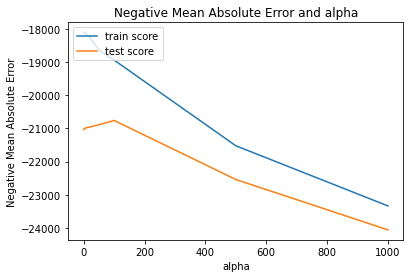

In [129]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [130]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -20763.854889560935 at alpha = 100


In [131]:
## run ridge using the best alpha 

alpha = best_alpha 

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train[col], y_train) 

Lasso(alpha=100)

In [132]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,lasso3.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature          Coeff      Abs_Coeff
22       Condition2_PosN -104250.356259  104250.356259
30      RoofMatl_WdShngl   66785.167032   66785.167032
14  Neighborhood_NoRidge   57681.589656   57681.589656
50        KitchenQual_Fa  -41513.414505   41513.414505
16  Neighborhood_StoneBr   37717.978575   37717.978575
52        KitchenQual_TA  -37403.990539   37403.990539
38    Exterior2nd_Stucco  -36820.749392   36820.749392
15  Neighborhood_NridgHt   35779.388951   35779.388951
1              GrLivArea   34954.997699   34954.997699
42       Foundation_Slab  -34229.404976   34229.404976
51        KitchenQual_Gd  -29668.487100   29668.487100
47       BsmtExposure_Gd   28810.425484   28810.425484
46           BsmtQual_TA  -28487.755935   28487.755935
0            OverallQual   27888.927469   27888.927469
8        LandContour_Low   26303.609385   26303.609385
23        BldgType_Twnhs  -24120.337264   24120.337264
25      RoofMatl_CompShg   23770.699867   23770.699867
7        LandContour_HLS   23025.269348   23025.269348
41          ExterQual_TA  -22137.611881   22137.611881
2           KitchenAbvGr  -21800.473629   21800.473629
45           BsmtQual_Gd  -21455.366752   21455.366752
24       BldgType_TwnhsE  -19957.898661   19957.898661
3            MSZoning_FV   19614.998451   19614.998451
12  Neighborhood_Crawfor   18243.248635   18243.248635
32   Exterior1st_BrkFace   18091.871802   18091.871802
58          SaleType_New   17152.365667   17152.365667
9        LandContour_Lvl   16677.829086   16677.829086
44           BsmtQual_Fa  -16378.759227   16378.759227
13  Neighborhood_Edwards  -15016.387136   15016.387136
10     LotConfig_CulDSac   14456.738475   14456.738475
40          ExterQual_Gd  -14357.219475   14357.219475
48      BsmtFinType1_Unf  -14281.476779   14281.476779
54        Functional_Typ   14234.161214   14234.161214
18       Condition1_Norm   13358.700019   13358.700019
4            MSZoning_RL   11800.976882   11800.976882
20       Condition1_RRAn   11192.711556   11192.711556
39          ExterQual_Fa   -8811.558318    8811.558318
33   Exterior1st_CemntBd    7969.155412    7969.155412
6           LotShape_IR3   -7464.017905    7464.017905
36   Exterior2nd_ImStucc    6708.411302    6708.411302
19       Condition1_PosA    3298.843023    3298.843023
11         LandSlope_Sev    3148.407990    3148.407990
56         GarageCond_Gd   -2901.352844    2901.352844
17  Neighborhood_Veenker    2842.070653    2842.070653

In [133]:
## print the coef_list shape
coef_list.shape

(44, 3)

In [134]:
coef_list.to_csv('lasso3.csv')

In [135]:
## predict using Ridge model on the Train and test datasets
y_train_pred = lasso3.predict(X_train[col])
y_test_pred = lasso3.predict(X_test[col])

In [136]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8671835611145432
Test r2 score: 0.8529090987159025


######  Build model using the Best RFE score - 30 features

In [137]:
# run RFE using the best hyperparameter value determined
n_features = 30

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=30)

In [138]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 158),
 ('LotArea', False, 160),
 ('OverallQual', True, 1),
 ('OverallCond', False, 101),
 ('MasVnrArea', False, 167),
 ('BsmtFinSF1', False, 104),
 ('BsmtFinSF2', False, 206),
 ('BsmtUnfSF', False, 105),
 ('TotalBsmtSF', False, 103),
 ('1stFlrSF', False, 152),
 ('2ndFlrSF', False, 51),
 ('LowQualFinSF', False, 210),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 95),
 ('HalfBath', False, 97),
 ('BedroomAbvGr', False, 120),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 107),
 ('Fireplaces', False, 109),
 ('GarageCars', False, 34),
 ('GarageArea', False, 146),
 ('WoodDeckSF', False, 185),
 ('OpenPorchSF', False, 199),
 ('EnclosedPorch', False, 208),
 ('3SsnPorch', False, 203),
 ('ScreenPorch', False, 205),
 ('PoolArea', False, 212),
 ('MiscVal', False, 211),
 ('house_age', False, 85),
 ('house_remod_age', False, 139),
 ('garage_age', False, 121),
 ('MSSubClass_SC_160', False, 202),
 ('MSSubClass_SC

In [139]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'KitchenAbvGr', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior2nd_Stucco', 'Foundation_Slab',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageQual_Po', 'SaleType_Con'],
      dtype='object')

In [140]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008178      0.001716         0.002793        0.000746      0.0001   
1       0.005585      0.001353         0.002394        0.000488       0.001   
2       0.007061      0.007140         0.000997        0.001093        0.01   
3       0.005186      0.001163         0.002194        0.000977        0.05   
4       0.006383      0.001621         0.002992        0.001093         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24113.918438      -22669.352183      -21173.413844   
1   {'alpha': 0.001}      -24113.919463      -22669.345913      -21173.414930   
2    {'alpha': 0.01}      -24113.929711      -22669.283217      -21173.425779   
3    {'alpha': 0.05}      -24113.975257      -22669.004568      -21173.473900   
4     {'alpha': 0.1}      -24114.032182      -22668.656263      -21173.534219   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -24246.419148      -24452.634733    -23331.147669     1249.157613   
1      -24246.416005      -24452.625894    -23331.144441     1249.155983   
2      -24246.384577      -24452.537525    -23331.112162     1249.139691   
3      -24246.244940      -24452.144610    -23330.968655     1249.067301   
4      -24246.070264      -24451.653651    -23330.789316     1248.976797   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -21509.894834       -22075.853643   
1               25       -21509.897009       -22075.853926   
2               24       -21509.918762       -22075.856759   
3               23       -21510.015441       -22075.869349   
4               22       -21510.136295       -22075.885091   

   split2_train_score  split3_train_score  split4_train_score  \
0       -22377.314081       -21641.960452       -21520.217120   
1       -22377.313712       -21641.960614       -21520.216738   
2       -22377.310019       -21641.962231       -21520.212916   
3       -22377.293615       -21641.969423       -21520.195974   
4       -22377.273097       -21641.978399       -21520.174747   

   mean_train_score  std_train_score  
0     -21825.048026       344.576763  
1     -21825.048400       344.576339  
2     -21825.052137       344.572093  
3     -21825.068761       344.553219  
4     -21825.089526       344.529638

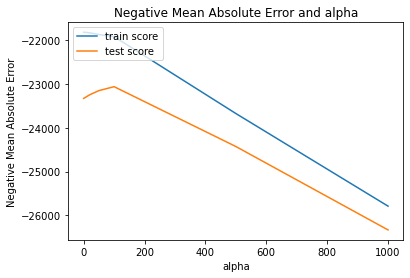

In [142]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [143]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -23065.382361572163 at alpha = 100


In [144]:
## run ridge using the best alpha 

alpha = best_alpha 

lasso4 = Lasso(alpha=alpha)
        
lasso4.fit(X_train[col], y_train) 

Lasso(alpha=100)

In [145]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,lasso4.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
10       Condition2_PosN -98403.910577  98403.910577
15      RoofMatl_WdShngl  69132.218877  69132.218877
7   Neighborhood_NoRidge  62642.069233  62642.069233
24        KitchenQual_Fa -62053.421584  62053.421584
26        KitchenQual_TA -53056.048983  53056.048983
17    Exterior2nd_Stucco -42308.139105  42308.139105
9   Neighborhood_StoneBr  41746.932061  41746.932061
8   Neighborhood_NridgHt  39464.992684  39464.992684
25        KitchenQual_Gd -39096.344779  39096.344779
19           BsmtQual_Fa -37811.494590  37811.494590
21           BsmtQual_TA -37409.321092  37409.321092
4        LandContour_Low  35478.008615  35478.008615
18       Foundation_Slab -33470.309715  33470.309715
1              GrLivArea  33252.146110  33252.146110
0            OverallQual  32227.159345  32227.159345
22       BsmtExposure_Gd  31635.070741  31635.070741
11        BldgType_Twnhs -28733.996982  28733.996982
13      RoofMatl_CompShg  28562.009870  28562.009870
6   Neighborhood_Crawfor  25531.834783  25531.834783
3        LandContour_HLS  24946.407486  24946.407486
20           BsmtQual_Gd -24785.751115  24785.751115
2           KitchenAbvGr -24338.447980  24338.447980
12       BldgType_TwnhsE -21025.956667  21025.956667
5        LandContour_Lvl  19385.581686  19385.581686

In [146]:
## print the coef_list shape
coef_list.shape

(24, 3)

In [147]:
coef_list.to_csv('lasso4.csv')

In [148]:
## predict using Ridge model on the Train and test datasets
y_train_pred = lasso4.predict(X_train[col])
y_test_pred = lasso4.predict(X_test[col])

In [149]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.840360294735002
Test r2 score: 0.8207354133946406


### Lasso Summary

**Lasso (no RFE) - Model1**  
Train R2 Score	89.6  
Test R2 Score	88.5  
number of features in the model	output 114  
Optimal alpha	100  
	
**Lasso (w/ RFE Best score - 120 features) - Model2**  
Train R2 Score	89.2  
Test R2 Score	88.2  
number of features in the model ouput 89  
Optimal alpha	100  
	
**Lasso (w/ RFE 60 features in input) - Model3** 	
Train R2 Score	86.7  
Test R2 Score	85.2   
number of features in the model	44   
Optimal alpha	100  
	
**Lasso (w/ RFE 30 features) - Model4**  	
Train R2 Score	84.0   
Test R2 Score	82.0  
numberof features in the model	24   
Optimal alpha	100    

####  The Lasso model with all the features as input(with no RFE)  has the best Train and Test R2 score.  This is the best Lasso model compared to Model 2. 

#### Model3 and Model4 have lesser R2 score

#### We will select Model1 for further usage


#### The top predictors from Lasso model and their coefficient values

    Feature	Coeff
    Condition2_PosN	-99167.10595
    RoofMatl_WdShngl	72033.21509
    Neighborhood_NoRidge	56604.54957
    Neighborhood_StoneBr	40008.33502
    Neighborhood_NridgHt	33583.29879
    KitchenQual_Gd	-27329.07237
    KitchenQual_TA	-26453.63883
    GrLivArea	24955.95073
    Exterior2nd_Stucco	-22566.13277
    KitchenAbvGr	-20081.9342

### Ridge

Create a model using Ridge regularization technique

In [150]:
## create the list of alphas and run GridsearchCV to find the optimal alpha

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009375      0.002862         0.003390        0.001353      0.0001   
1        0.007181      0.000978         0.003191        0.001466       0.001   
2        0.009773      0.002309         0.003391        0.001353        0.01   
3        0.008377      0.001493         0.003590        0.000798        0.05   
4        0.009375      0.002054         0.002992        0.000631         0.1   
5        0.008004      0.005610         0.001396        0.001954         0.2   
6        0.009373      0.007653         0.003124        0.006249         0.3   
7        0.009379      0.007658         0.003124        0.006248         0.4   
8        0.006249      0.007653         0.003134        0.006268         0.5   
9        0.009370      0.007651         0.003127        0.006254         0.6   
10       0.006249      0.007654         0.003118        0.006236         0.7   
11       0.006249      0.007653         0.003124        0.006248         0.8   
12       0.009379      0.007658         0.003118        0.006236         0.9   
13       0.006255      0.007661         0.000000        0.000000           1   
14       0.006203      0.006178         0.007047        0.007152           2   
15       0.003124      0.006249         0.000000        0.000000           3   
16       0.003125      0.006250         0.006248        0.007652           4   
17       0.004321      0.006107         0.006032        0.006685           5   
18       0.002608      0.003325         0.003524        0.006099           6   
19       0.015621      0.000002         0.003124        0.006249           7   
20       0.006249      0.007653         0.006248        0.007652           8   
21       0.003124      0.006249         0.003124        0.006248           9   
22       0.006249      0.007654         0.003124        0.006248          10   
23       0.012498      0.006249         0.000000        0.000000          20   
24       0.015628      0.000013         0.003124        0.006248          50   
25       0.006255      0.007661         0.003118        0.006236         100   
26       0.009363      0.007645         0.006252        0.007657         500   
27       0.006255      0.007661         0.003117        0.006234        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -24469.858994      -25657.570690   
1    {'alpha': 0.001}      -24367.272775      -25528.480425   
2     {'alpha': 0.01}      -23700.292776      -24616.162532   
3     {'alpha': 0.05}      -23022.282348      -23207.482699   
4      {'alpha': 0.1}      -22719.402382      -22689.858615   
5      {'alpha': 0.2}      -22370.342677      -22257.616599   
6      {'alpha': 0.3}      -22113.953075      -22069.387958   
7      {'alpha': 0.4}      -21907.003668      -21981.413686   
8      {'alpha': 0.5}      -21747.862688      -21946.731592   
9      {'alpha': 0.6}      -21610.111458      -21907.344960   
10     {'alpha': 0.7}      -21484.876647      -21890.733966   
11     {'alpha': 0.8}      -21369.565041      -21875.240182   
12     {'alpha': 0.9}      -21262.345874      -21855.351587   
13     {'alpha': 1.0}      -21161.880224      -21833.612972   
14     {'alpha': 2.0}      -20441.703437      -21571.801710   
15     {'alpha': 3.0}      -20034.872308      -21357.992695   
16     {'alpha': 4.0}      -19747.671268      -21193.959164   
17     {'alpha': 5.0}      -19525.702671      -21039.424238   
18     {'alpha': 6.0}      -19339.685576      -20887.678217   
19     {'alpha': 7.0}      -19194.093803      -20753.417922   
20     {'alpha': 8.0}      -19080.069810      -20630.043239   
21     {'alpha': 9.0}      -18988.172424      -20527.678097   
22    {'alpha': 10.0}      -18920.951135      -20434.882732   
23      {'alpha': 20}      -18537.623652      -19838.611485   
24      {'alpha': 50}      -18293.973948      -19469.787916   
25     {'alpha': 100}      -18309.302558     

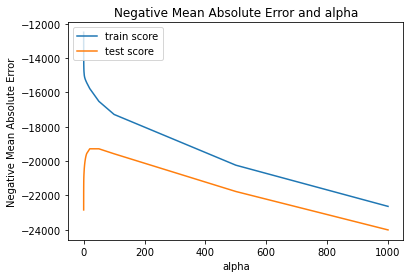

In [152]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [153]:
## get the best MAE and alpha
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest neg MAE accuracy is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest neg MAE accuracy is -19283.90934328768 at alpha = 20


In [154]:
## create a model using Ridge and the best alpha
alpha = best_alpha

ridge1 = Ridge(alpha=alpha)
        
ridge1.fit(X_train, y_train) 

Ridge(alpha=20)

In [155]:
## display the features and their coeffcients
coef_list = pd.DataFrame(list(zip(X_train.columns,ridge1.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list=coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
79    Neighborhood_NoRidge  27647.280267  27647.280267
2              OverallQual  21689.418321  21689.418321
80    Neighborhood_NridgHt  19192.016772  19192.016772
12               GrLivArea  18952.545017  18952.545017
205         KitchenQual_Gd -17789.732184  17789.732184
172            BsmtQual_Gd -16203.797805  16203.797805
86    Neighborhood_StoneBr  16169.933277  16169.933277
71    Neighborhood_Edwards -15616.892838  15616.892838
206         KitchenQual_TA -15262.670406  15262.670406
10                2ndFlrSF  14675.965599  14675.965599
177        BsmtExposure_Gd  14127.112435  14127.112435
126       RoofMatl_WdShngl  13514.440556  13514.440556
21              GarageCars  13180.504096  13180.504096
100        Condition2_PosN -12532.485455  12532.485455
161           ExterQual_TA -12078.770804  12078.770804
173            BsmtQual_TA -11220.536400  11220.536400
57         LandContour_Lvl  11050.546695  11050.546695
70    Neighborhood_Crawfor  10993.931847  10993.931847
18            KitchenAbvGr -10769.313827  10769.313827
55         LandContour_HLS  10397.724693  10397.724693
90         Condition1_Norm  10236.828624  10236.828624
152     Exterior2nd_Stucco  -9974.812944   9974.812944
147    Exterior2nd_ImStucc   9745.523739   9745.523739
72    Neighborhood_Gilbert  -9440.790620   9440.790620
36        MSSubClass_SC_20   9350.831699   9350.831699
129    Exterior1st_BrkFace   9222.405043   9222.405043
107        BldgType_TwnhsE  -9058.565687   9058.565687
181       BsmtFinType1_GLQ   8718.105144   8718.105144
160           ExterQual_Gd  -8401.857423   8401.857423
106         BldgType_Twnhs  -8323.189789   8323.189789
19            TotRmsAbvGrd   8067.229529   8067.229529
53            LotShape_IR3  -8001.428902   8001.428902
76      Neighborhood_NAmes  -7709.650971   7709.650971
75    Neighborhood_Mitchel  -7647.612578   7647.612578
78     Neighborhood_NWAmes  -7640.574669   7640.574669
212         Functional_Typ   7567.759034   7567.759034
13            BsmtFullBath   7301.672029   7301.672029
30               house_age  -7242.121841   7242.121841
239           SaleType_New   7225.556606   7225.556606
137     Exterior1st_Stucco  -7094.036422   7094.036422
109      HouseStyle_1Story   6811.736419   6811.736419
15                FullBath   6794.593884   6794.593884
92         Condition1_PosN  -6704.102317   6704.102317
63           LandSlope_Mod   6562.950483   6562.950483
98         Condition2_Norm   6500.126611   6500.126611
167       Foundation_PConc   6341.296716   6341.296716
204         KitchenQual_Fa  -6313.892981   6313.892981
112      HouseStyle_2Story  -6185.453921   6185.453921
20              Fireplaces   6172.172320   6172.172320
59       LotConfig_CulDSac   6167.401267   6167.401267
223       GarageFinish_Unf  -6115.907762   6115.907762
16                HalfBath   6013.051225   6013.051225
33       MSSubClass_SC_160  -5921.727913   5921.727913
81    Neighborhood_OldTown  -5881.347087   5881.347087
222       GarageFinish_RFn  -5825.423280   5825.423280
49             MSZoning_RL   5608.355360   5608.355360
47             MSZoning_FV   5502.155777   5502.155777
179        BsmtExposure_No  -5466.193286   5466.193286
3              OverallCond   5352.047128   5352.047128
224          GarageQual_Fa  -5240.941183   5240.941183
52            LotShape_IR2   5034.947443   5034.947443
184       BsmtFinType1_Unf  -5019.111487   5019.111487
85    Neighborhood_Somerst   5006.545564   5006.545564
89        Condition1_Feedr  -4869.262788   4869.262788
166      Foundation_CBlock   4667.340842   4667.340842
60           LotConfig_FR2  -4658.728648   4658.728648
157        MasVnrType_None   4531.792029   4531.792029
88    Neighborhood_Veenker   4474.163170   4474.163170
83     Neighborhood_Sawyer  -4396.369289   4396.369289
69    Neighborhood_CollgCr  -4357.407478   4357.407478
185       BsmtFinType2_BLQ  -4245.640851   4245.640851
51             Street_Pave   4158.988309   4158.988309
37  

In [156]:
coef_list.shape

(241, 3)

In [157]:
coef_list.to_csv('ridge1.csv')

In [158]:
## predict using the Ridge model on the Train and test data sets
y_train_pred = ridge1.predict(X_train)
y_test_pred = ridge1.predict(X_test)

In [159]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8814277746460227
Test r2 score: 0.8856042926810821


### Ridge with RFE

Create a model using Ridge and RFE. Select the features using RFE and then use in the Ridge regression

#### Ridge with RFE - Best score - 150 features

In [160]:
# run RFE using the best hyperparameter value determined
n_features = best_features_to_select

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=150)

In [161]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', False, 40),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 47),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 32),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 90),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 26),
 ('WoodDeckSF', False, 65),
 ('OpenPorchSF', False, 79),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 85),
 ('PoolArea', False, 92),
 ('MiscVal', False, 91),
 ('house_age', True, 1),
 ('house_remod_age', False, 19),
 ('garage_age', True, 1),
 ('MSSubClass_SC_160', False, 82),
 ('MSSubClass_SC_180', True, 1),
 ('MSSubClass_SC_190', False, 15),
 ('

In [162]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageCond_Po', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=150)

In [163]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005585      0.000489         0.003391    1.016729e-03      0.0001   
1       0.006185      0.002310         0.003390    1.351834e-03       0.001   
2       0.004581      0.003609         0.002593    2.147871e-03        0.01   
3       0.004306      0.001195         0.001994    9.047349e-07        0.05   
4       0.006783      0.002476         0.003389    1.194918e-03         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19501.501008      -21689.370708      -19230.861423   
1   {'alpha': 0.001}      -19492.822974      -21640.739618      -19187.230728   
2    {'alpha': 0.01}      -19538.975420      -21258.352390      -18870.175903   
3    {'alpha': 0.05}      -20175.248904      -20524.869857      -18280.917571   
4     {'alpha': 0.1}      -20466.308355      -20145.777658      -18065.018762   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -20025.206796      -18543.359939    -19798.059975     1059.489081   
1      -20023.761119      -18514.782249    -19771.867337     1054.140666   
2      -20009.557255      -18388.598305    -19613.131854      992.055326   
3      -19961.449919      -18669.479920    -19522.393234      882.346148   
4      -19909.212225      -19049.701155    -19527.203631      869.077129   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -12967.082053       -13571.041843   
1               25       -12967.125222       -13573.672338   
2               24       -13032.767662       -13626.781990   
3               21       -13557.368926       -14048.586023   
4               22       -13957.961106       -14447.675752   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13747.245223       -13768.236422       -13295.228389   
1       -13751.333604       -13768.745000       -13309.816985   
2       -13828.920386       -13773.638376       -13470.037778   
3       -14363.535686       -13793.904827       -14108.079287   
4       -14818.557353       -13815.892347       -14566.872343   

   mean_train_score  std_train_score  
0     -13469.766786       303.147039  
1     -13474.138630       302.523098  
2     -13546.429238       285.505053  
3     -13974.294950       276.149839  
4     -14321.391780       377.092426

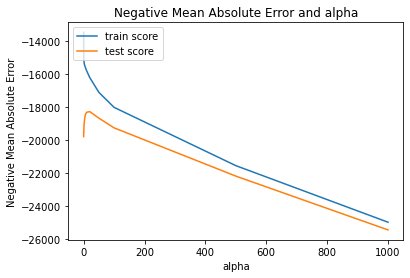

In [165]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [166]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -18280.6111584652 at alpha = 20


In [167]:
## run ridge using the best alpha 

alpha = best_alpha 

ridge2 = Ridge(alpha=alpha)
        
ridge2.fit(X_train[col], y_train) 

Ridge(alpha=20)

In [168]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,ridge2.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list=coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
50    Neighborhood_NoRidge  30599.491617  30599.491617
6                GrLivArea  22402.903656  22402.903656
0              OverallQual  21919.529814  21919.529814
51    Neighborhood_NridgHt  21169.840821  21169.840821
56    Neighborhood_StoneBr  18613.022969  18613.022969
115        BsmtExposure_Gd  18133.310385  18133.310385
124         KitchenQual_Gd -17534.736908  17534.736908
113            BsmtQual_Gd -16321.052961  16321.052961
44    Neighborhood_Edwards -15393.717667  15393.717667
125         KitchenQual_TA -15279.365070  15279.365070
86        RoofMatl_WdShngl  14676.521715  14676.521715
5                 2ndFlrSF  14011.401369  14011.401369
15              GarageCars  13656.650118  13656.650118
101     Exterior2nd_Stucco -13518.223797  13518.223797
58         Condition1_Norm  13142.938416  13142.938416
12            KitchenAbvGr -13068.318351  13068.318351
114            BsmtQual_TA -12344.396106  12344.396106
66         Condition2_PosN -12222.682039  12222.682039
107           ExterQual_TA -11953.043368  11953.043368
88     Exterior1st_BrkFace  11321.677493  11321.677493
33         LandContour_HLS  10772.385154  10772.385154
36       LotConfig_CulDSac  10732.294490  10732.294490
35         LandContour_Lvl  10107.114590  10107.114590
69          BldgType_Twnhs -10006.940392  10006.940392
43    Neighborhood_Crawfor   9960.864294   9960.864294
70         BldgType_TwnhsE  -9578.550711   9578.550711
106           ExterQual_Gd  -9558.326732   9558.326732
49     Neighborhood_NWAmes  -9221.103775   9221.103775
7             BsmtFullBath   8894.368982   8894.368982
123         KitchenQual_Fa  -8884.219817   8884.219817
19        MSSubClass_SC_20   8872.064212   8872.064212
98     Exterior2nd_ImStucc   8835.184539   8835.184539
16               house_age  -8805.695431   8805.695431
48      Neighborhood_NAmes  -8756.180048   8756.180048
146           SaleType_New   8337.857380   8337.857380
45    Neighborhood_Gilbert  -8214.938981   8214.938981
13            TotRmsAbvGrd   8107.776804   8107.776804
116       BsmtFinType1_GLQ   8065.032732   8065.032732
31            LotShape_IR2   7993.463590   7993.463590
75       HouseStyle_2Story  -7990.198776   7990.198776
14              Fireplaces   7899.099485   7899.099485
135       GarageFinish_Unf  -7673.186600   7673.186600
129         Functional_Typ   7600.096374   7600.096374
39           LandSlope_Mod   7291.437909   7291.437909
9                 FullBath   7266.688671   7266.688671
72       HouseStyle_1Story   6917.773767   6917.773767
134       GarageFinish_RFn  -6827.069512   6827.069512
4              TotalBsmtSF   6731.090645   6731.090645
64         Condition2_Norm   6706.588855   6706.588855
47    Neighborhood_Mitchel  -6669.625957   6669.625957
32            LotShape_IR3  -6563.250686   6563.250686
52    Neighborhood_OldTown  -6464.086226   6464.086226
10                HalfBath   6298.274627   6298.274627
109       Foundation_PConc   6287.637188   6287.637188
28             MSZoning_RL   6089.872508   6089.872508
26             MSZoning_FV   5976.084108   5976.084108
55    Neighborhood_Somerst   5951.836119   5951.836119
1              OverallCond   5865.400818   5865.400818
34         LandContour_Low   5395.689409   5395.689409
57    Neighborhood_Veenker   5237.656548   5237.656548
117       BsmtFinType1_Unf  -5079.502519   5079.502519
89     Exterior1st_CemntBd   4913.235461   4913.235461
132         FireplaceQu_TA  -4894.306645   4894.306645
54     Neighborhood_Sawyer  -4682.406948   4682.406948
80        RoofMatl_CompShg   4627.939717   4627.939717
136          GarageQual_Fa  -4495.333829   4495.333829
104       MasVnrType_Stone   4487.182761   4487.182761
105           ExterQual_Fa  -4479.248478   4479.248478
108      Foundation_CBlock   4442.801776   4442.801776
71       HouseStyle_1.5Unf   4360.368156   4360.368156
68         BldgType_Duplex  -4307.303062   4307.303062
20        MSSubClass_SC_30   4288.869999   4288.869999
61  

In [169]:
## print the coef_list shape
coef_list.shape

(150, 3)

In [170]:
coef_list.to_csv('ridge2.csv')

In [171]:
## predict using Ridge model on the Train and test datasets
y_train_pred = ridge2.predict(X_train[col])
y_test_pred = ridge2.predict(X_test[col])

In [172]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8755025004186417
Test r2 score: 0.8836972177727722


#### Ridge with RFE - 60 features

In [173]:
# run RFE using the best hyperparameter value determined
n_features = 60

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=60)

In [174]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 128),
 ('LotArea', False, 130),
 ('OverallQual', True, 1),
 ('OverallCond', False, 71),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', False, 74),
 ('BsmtFinSF2', False, 176),
 ('BsmtUnfSF', False, 75),
 ('TotalBsmtSF', False, 73),
 ('1stFlrSF', False, 122),
 ('2ndFlrSF', False, 21),
 ('LowQualFinSF', False, 180),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 86),
 ('FullBath', False, 65),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 90),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 77),
 ('Fireplaces', False, 79),
 ('GarageCars', False, 4),
 ('GarageArea', False, 116),
 ('WoodDeckSF', False, 155),
 ('OpenPorchSF', False, 169),
 ('EnclosedPorch', False, 178),
 ('3SsnPorch', False, 173),
 ('ScreenPorch', False, 175),
 ('PoolArea', False, 182),
 ('MiscVal', False, 181),
 ('house_age', False, 55),
 ('house_remod_age', False, 109),
 ('garage_age', False, 91),
 ('MSSubClass_SC_160', False, 172),
 ('MSSubClass_SC_180', Fal

In [175]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'KitchenAbvGr', 'MSZoning_FV',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRAn', 'Condition2_PosA', 'Condition2_PosN',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior2nd_AsphShn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Slab', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'Bsmt

In [176]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003391      0.000798         0.002792        0.001465      0.0001   
1       0.004588      0.001354         0.002393        0.000489       0.001   
2       0.004588      0.001353         0.002992        0.001411        0.01   
3       0.003790      0.000977         0.002793        0.000977        0.05   
4       0.004779      0.002691         0.002194        0.001163         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21988.327756      -20195.889225      -19255.997332   
1   {'alpha': 0.001}      -21988.397663      -20190.924692      -19250.943876   
2    {'alpha': 0.01}      -21988.889151      -20145.735812      -19201.977437   
3    {'alpha': 0.05}      -21988.142631      -19976.336399      -19020.890300   
4     {'alpha': 0.1}      -21993.537708      -19822.544040      -18859.805143   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -23154.642425      -20698.447321    -21058.660812     1369.754996   
1      -23154.135583      -20697.026927    -21056.285748     1371.640076   
2      -23149.343471      -20683.308695    -21033.850913     1389.589544   
3      -23128.931501      -20768.359557    -20976.532077     1450.823294   
4      -23103.847911      -20884.564915    -20932.859943     1508.039528   

   rank_test_score  split0_train_score  split1_train_score  \
0               23       -17632.727035       -18331.633962   
1               22       -17633.206760       -18331.844351   
2               21       -17637.916829       -18334.012176   
3               20       -17658.487432       -18349.167968   
4               19       -17686.865704       -18378.243094   

   split2_train_score  split3_train_score  split4_train_score  \
0       -18543.517512       -17812.403350       -18217.666064   
1       -18544.252443       -17812.702684       -18218.152134   
2       -18551.408910       -17815.706252       -18225.630527   
3       -18583.919442       -17829.947414       -18270.909836   
4       -18623.927041       -17847.316345       -18314.910203   

   mean_train_score  std_train_score  
0     -18107.589585       336.147356  
1     -18108.031674       336.209786  
2     -18112.934939       336.993163  
3     -18138.486418       342.323998  
4     -18170.252477       348.699608

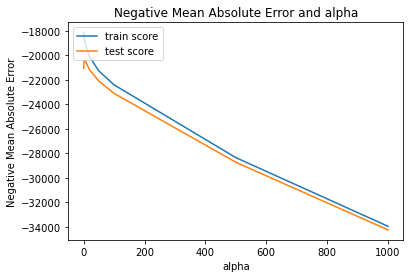

In [178]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [179]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -20416.784784313346 at alpha = 4.0


In [180]:
## run ridge using the best alpha 

alpha = best_alpha 

ridge3 = Ridge(alpha=alpha)
        
ridge3.fit(X_train[col], y_train) 

Ridge(alpha=4.0)

In [181]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,ridge3.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list=coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
14   Neighborhood_NoRidge  53288.907181  53288.907181
22        Condition2_PosN -50038.945831  50038.945831
30       RoofMatl_WdShngl  43988.638575  43988.638575
16   Neighborhood_StoneBr  36166.210346  36166.210346
1               GrLivArea  34948.021923  34948.021923
50         KitchenQual_Fa -34869.781538  34869.781538
15   Neighborhood_NridgHt  34070.189961  34070.189961
38     Exterior2nd_Stucco -33704.514697  33704.514697
42        Foundation_Slab -33626.156789  33626.156789
52         KitchenQual_TA -32973.201275  32973.201275
46            BsmtQual_TA -29941.875839  29941.875839
47        BsmtExposure_Gd  27672.048210  27672.048210
0             OverallQual  27529.483315  27529.483315
8         LandContour_Low  26740.737616  26740.737616
41           ExterQual_TA -26668.081389  26668.081389
51         KitchenQual_Gd -26261.559738  26261.559738
23         BldgType_Twnhs -24628.661068  24628.661068
7         LandContour_HLS  24085.684614  24085.684614
45            BsmtQual_Gd -22793.040248  22793.040248
3             MSZoning_FV  22080.829652  22080.829652
2            KitchenAbvGr -21211.660478  21211.660478
24        BldgType_TwnhsE -20735.669212  20735.669212
25       RoofMatl_CompShg  20011.450698  20011.450698
12   Neighborhood_Crawfor  19349.835034  19349.835034
32    Exterior1st_BrkFace  18680.946663  18680.946663
9         LandContour_Lvl  18190.660668  18190.660668
44            BsmtQual_Fa -17911.159944  17911.159944
40           ExterQual_Gd -17406.782807  17406.782807
13   Neighborhood_Edwards -16525.657935  16525.657935
58           SaleType_New  16387.543682  16387.543682
39           ExterQual_Fa -16041.575126  16041.575126
20        Condition1_RRAn  15717.690769  15717.690769
18        Condition1_Norm  15684.266020  15684.266020
54         Functional_Typ  15630.030087  15630.030087
10      LotConfig_CulDSac  14675.347080  14675.347080
4             MSZoning_RL  14551.556772  14551.556772
48       BsmtFinType1_Unf -14495.013617  14495.013617
36    Exterior2nd_ImStucc  14332.953553  14332.953553
56          GarageCond_Gd -14144.873637  14144.873637
6            LotShape_IR3 -13899.763823  13899.763823
19        Condition1_PosA  13745.454294  13745.454294
49           Heating_OthW -12739.326927  12739.326927
17   Neighborhood_Veenker  12723.346903  12723.346903
33    Exterior1st_CemntBd  11509.790733  11509.790733
53         Functional_Sev -10733.844066  10733.844066
55          GarageQual_Po -10684.209833  10684.209833
11          LandSlope_Sev  10358.559767  10358.559767
37      Exterior2nd_Stone  -9845.875874   9845.875874
31    Exterior1st_AsphShn  -9139.510771   9139.510771
34    Exterior2nd_AsphShn  -9139.510771   9139.510771
43        Foundation_Wood  -8902.121129   8902.121129
57           SaleType_Con   8486.633631   8486.633631
21        Condition2_PosA   8422.551520   8422.551520
26       RoofMatl_Membran   6954.140732   6954.140732
29       RoofMatl_WdShake   4927.333825   4927.333825
35    Exterior2nd_CmentBd  -4190.186280   4190.186280
28       RoofMatl_Tar&Grv  -3761.609197   3761.609197
27          RoofMatl_Roll   3500.026005   3500.026005
5             MSZoning_RM   3001.921219   3001.921219
59  SaleCondition_Partial     82.817725     82.817725

In [182]:
## print the coef_list shape
coef_list.shape

(60, 3)

In [183]:
coef_list.to_csv('ridge3.csv')

In [184]:
## predict using Ridge model on the Train and test datasets
y_train_pred = ridge3.predict(X_train[col])
y_test_pred = ridge3.predict(X_test[col])

In [185]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8664947911255667
Test r2 score: 0.8526229362709179


#### Ridge with RFE -  30 features

In [186]:
# run RFE using the best hyperparameter value determined
n_features = 30

lr = Ridge()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=n_features)
rfe.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=30)

In [187]:
# display the list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 158),
 ('LotArea', False, 160),
 ('OverallQual', True, 1),
 ('OverallCond', False, 101),
 ('MasVnrArea', False, 167),
 ('BsmtFinSF1', False, 104),
 ('BsmtFinSF2', False, 206),
 ('BsmtUnfSF', False, 105),
 ('TotalBsmtSF', False, 103),
 ('1stFlrSF', False, 152),
 ('2ndFlrSF', False, 51),
 ('LowQualFinSF', False, 210),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 95),
 ('HalfBath', False, 97),
 ('BedroomAbvGr', False, 120),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 107),
 ('Fireplaces', False, 109),
 ('GarageCars', False, 34),
 ('GarageArea', False, 146),
 ('WoodDeckSF', False, 185),
 ('OpenPorchSF', False, 199),
 ('EnclosedPorch', False, 208),
 ('3SsnPorch', False, 203),
 ('ScreenPorch', False, 205),
 ('PoolArea', False, 212),
 ('MiscVal', False, 211),
 ('house_age', False, 85),
 ('house_remod_age', False, 139),
 ('garage_age', False, 121),
 ('MSSubClass_SC_160', False, 202),
 ('MSSubClass_SC

In [188]:
## create the list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'KitchenAbvGr', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior2nd_Stucco', 'Foundation_Slab',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageQual_Po', 'SaleType_Con'],
      dtype='object')

In [189]:
## create a hyperparameter list of alphas and tune using GridSearchCV and features selected by RFE

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
## view the results of the CV in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004787      0.001162         0.002593        0.000489      0.0001   
1       0.004189      0.000977         0.002393        0.000798       0.001   
2       0.004388      0.001016         0.002592        0.000489        0.01   
3       0.004720      0.005560         0.001197        0.000977        0.05   
4       0.003253      0.002212         0.004919        0.005402         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24113.907389      -22669.173008      -21173.393332   
1   {'alpha': 0.001}      -24113.808939      -22667.555796      -21173.209856   
2    {'alpha': 0.01}      -24112.821368      -22651.543266      -21171.380651   
3    {'alpha': 0.05}      -24108.367833      -22584.497741      -21163.373882   
4     {'alpha': 0.1}      -24102.667274      -22508.971671      -21153.650270   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -24246.391690      -24452.553501    -23331.083784     1249.163692   
1      -24246.141690      -24451.813828    -23330.506022     1249.216801   
2      -24243.667015      -24444.441702    -23324.770800     1249.750481   
3      -24233.200046      -24412.202066    -23300.328314     1252.072556   
4      -24221.230538      -24373.041650    -23271.912280     1254.827257   

   rank_test_score  split0_train_score  split1_train_score  \
0               23       -21509.903080       -22075.872235   
1               22       -21509.979244       -22076.039505   
2               21       -21510.718441       -22077.726727   
3               20       -21513.568204       -22084.935294   
4               19       -21516.219945       -22095.229761   

   split2_train_score  split3_train_score  split4_train_score  \
0       -22377.309628       -21641.967574       -21520.207520   
1       -22377.269008       -21642.031637       -21520.120658   
2       -22376.846338       -21642.653584       -21519.243771   
3       -22374.779431       -21645.370512       -21515.176866   
4       -22371.837031       -21649.051991       -21509.977404   

   mean_train_score  std_train_score  
0     -21825.052007       344.577476  
1     -21825.088010       344.583448  
2     -21825.437772       344.648867  
3     -21826.766061       344.979731  
4     -21828.463227       345.698410

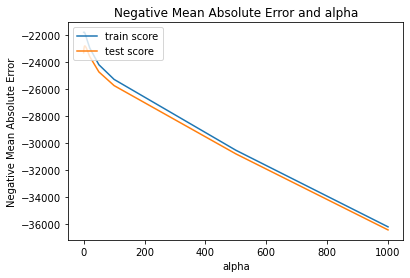

In [191]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [192]:
# get the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest test neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest test neg MAE is -22821.589322113625 at alpha = 4.0


In [193]:
## run ridge using the best alpha 

alpha = best_alpha 

ridge4 = Ridge(alpha=alpha)
        
ridge4.fit(X_train[col], y_train) 

Ridge(alpha=4.0)

In [194]:
## display the features and their coefficient values
coef_list = pd.DataFrame(list(zip(X_train[col].columns,ridge4.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list=coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
7   Neighborhood_NoRidge  57496.750554  57496.750554
24        KitchenQual_Fa -51261.868186  51261.868186
10       Condition2_PosN -48638.011722  48638.011722
26        KitchenQual_TA -46825.077966  46825.077966
15      RoofMatl_WdShngl  45455.987280  45455.987280
9   Neighborhood_StoneBr  39317.006088  39317.006088
17    Exterior2nd_Stucco -39041.875652  39041.875652
8   Neighborhood_NridgHt  39002.402584  39002.402584
21           BsmtQual_TA -37135.313347  37135.313347
4        LandContour_Low  35333.104729  35333.104729
19           BsmtQual_Fa -35068.828672  35068.828672
0            OverallQual  33745.136683  33745.136683
25        KitchenQual_Gd -33648.582072  33648.582072
1              GrLivArea  33389.182606  33389.182606
18       Foundation_Slab -31892.159664  31892.159664
22       BsmtExposure_Gd  31476.277921  31476.277921
11        BldgType_Twnhs -28209.703688  28209.703688
3        LandContour_HLS  26465.326598  26465.326598
6   Neighborhood_Crawfor  25136.576574  25136.576574
20           BsmtQual_Gd -24919.902388  24919.902388
2           KitchenAbvGr -24440.602320  24440.602320
13      RoofMatl_CompShg  23582.411367  23582.411367
5        LandContour_Lvl  21319.135742  21319.135742
12       BldgType_TwnhsE -20877.979101  20877.979101
29          SaleType_Con  16216.808720  16216.808720
28         GarageQual_Po -14884.386438  14884.386438
23          Heating_OthW -13902.654190  13902.654190
27        Functional_Sev -12596.816043  12596.816043
16   Exterior1st_AsphShn -12473.088158  12473.088158
14      RoofMatl_Membran   7886.909963   7886.909963

In [195]:
## print the coef_list shape
coef_list.shape

(30, 3)

In [196]:
coef_list.to_csv('ridge4.csv')

In [197]:
## predict using Ridge model on the Train and test datasets
y_train_pred = ridge4.predict(X_train[col])
y_test_pred = ridge4.predict(X_test[col])

In [198]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8369920245405588
Test r2 score: 0.8245121522993923


### Ridge Summary

**Ridge (no RFE) - Model 1**	
Train R2 Score	88.1   
Test R2 Score	88.5    
number of features in the model	241     
Optimal alpha	20  
	
**Ridge (w/ RFE Best score - 150 features) - Model 2**  
Train R2 Score	87.5    
Test R2 Score	88.3     
number of features in the model	150    
Optimal alpha	20  
	
**Ridge (w/ RFE 60 features)- Model 3** 	
Train R2 Score	86.6   
Test R2 Score	85.2    
number of features in the model	60    
Optimal alpha	4    
	
**Ridge (w/ RFE 30 features) - Model 4**    	
Train R2 Score	83.6    
Test R2 Score	82.4  
numberof features in the model	30    
Optimal alpha 4   

#### The Ridge model Model1 created with all features (without RFE) and the model Model2 created with 150 features(determined with RFE) are very comparable in terms of R2 score.  The Model1 has high number of features but the coefficients are much smaller compared to the Model2 which has much lesser number of features.

#### Model 3 and Model 4 have lesser R2 score compared to Model1 and Model2

#### We will select Model1 for futher usage

#### The top predictors from the selected Ridge regression model and their coefficient values

    Feature	Coeff
    Neighborhood_NoRidge	27647.28027
    OverallQual	21689.41832
    Neighborhood_NridgHt	19192.01677
    GrLivArea	18952.54502
    KitchenQual_Gd	-17789.73218
    BsmtQual_Gd	-16203.7978
    Neighborhood_StoneBr	16169.93328
    Neighborhood_Edwards	-15616.89284
    KitchenQual_TA	-15262.67041
    2ndFlrSF	14675.9656


### Final Model selection

### Based on the multiple Lasso and Ridge models created above, the best model selected is Lasso Model1 based high R2 score for Train and Test and very similar Train and Test R2 scores (low variance) :

### **Lasso - Model1**  
Train R2 Score	89.6  
Test R2 Score	88.5  
number of features in the model	output 114  
Optimal alpha	100  
	
#### The top predictors from Lasso model and their coefficient values

    Feature	Coeff
    Condition2_PosN	-99167.10595
    RoofMatl_WdShngl	72033.21509
    Neighborhood_NoRidge	56604.54957
    Neighborhood_StoneBr	40008.33502
    Neighborhood_NridgHt	33583.29879
    KitchenQual_Gd	-27329.07237
    KitchenQual_TA	-26453.63883
    GrLivArea	24955.95073
    Exterior2nd_Stucco	-22566.13277
    KitchenAbvGr	-20081.9342

### Lasso - doubled optimal Alpha value

The optimal alpha for Lasso determined above is 100.  We will double this and check the changes in the predictors

In [199]:
## use the best hyperparameter value and create a model using Lasso
alpha = 100*2

lasso5 = Lasso(alpha=alpha)
        
lasso5.fit(X_train, y_train) 

Lasso(alpha=200)

In [200]:
## display the features and the coefficient values that are non-zero
coef_list = pd.DataFrame(list(zip(X_train.columns,lasso5.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
79   Neighborhood_NoRidge  53841.413769  53841.413769
100       Condition2_PosN -39260.746168  39260.746168
86   Neighborhood_StoneBr  33466.234374  33466.234374
80   Neighborhood_NridgHt  31887.210309  31887.210309
126      RoofMatl_WdShngl  28850.910605  28850.910605
12              GrLivArea  24744.917883  24744.917883
205        KitchenQual_Gd -23153.021721  23153.021721
206        KitchenQual_TA -22249.014812  22249.014812
2             OverallQual  21859.444286  21859.444286
70   Neighborhood_Crawfor  18003.965968  18003.965968
177       BsmtExposure_Gd  17929.663201  17929.663201
18           KitchenAbvGr -17011.809195  17011.809195
172           BsmtQual_Gd -16099.136741  16099.136741
152    Exterior2nd_Stucco -14584.231721  14584.231721
71   Neighborhood_Edwards -12733.253404  12733.253404
85   Neighborhood_Somerst  12598.958740  12598.958740
57        LandContour_Lvl  11519.822205  11519.822205
129   Exterior1st_BrkFace  11519.796818  11519.796818
90        Condition1_Norm  11226.958268  11226.958268
21             GarageCars  11126.146972  11126.146972
239          SaleType_New  10976.079583  10976.079583
161          ExterQual_TA -10215.269722  10215.269722
204        KitchenQual_Fa -10141.329137  10141.329137
173           BsmtQual_TA -10068.728522  10068.728522
55        LandContour_HLS   9938.298324   9938.298324
107       BldgType_TwnhsE  -9621.355724   9621.355724
36       MSSubClass_SC_20   9606.359738   9606.359738
30              house_age  -9488.071709   9488.071709
106        BldgType_Twnhs  -9296.327756   9296.327756
181      BsmtFinType1_GLQ   7804.629524   7804.629524
10               2ndFlrSF   7641.953316   7641.953316
212        Functional_Typ   7459.789552   7459.789552
19           TotRmsAbvGrd   7287.682983   7287.682983
160          ExterQual_Gd  -7114.310796   7114.310796
223      GarageFinish_Unf  -6481.145581   6481.145581
13           BsmtFullBath   6325.471346   6325.471346
63          LandSlope_Mod   6114.693742   6114.693742
59      LotConfig_CulDSac   5979.700939   5979.700939
222      GarageFinish_RFn  -5741.765368   5741.765368
3             OverallCond   5452.310656   5452.310656
15               FullBath   5090.215296   5090.215296
112     HouseStyle_2Story  -4716.376094   4716.376094
156    MasVnrType_BrkFace  -4491.662087   4491.662087
109     HouseStyle_1Story   4358.532186   4358.532186
179       BsmtExposure_No  -4025.664995   4025.664995
167      Foundation_PConc   3982.364599   3982.364599
81   Neighborhood_OldTown  -3678.523097   3678.523097
20             Fireplaces   3657.787904   3657.787904
16               HalfBath   3606.506014   3606.506014
184      BsmtFinType1_Unf  -3543.211421   3543.211421
189      BsmtFinType2_Unf   3414.969660   3414.969660
76     Neighborhood_NAmes  -3119.726307   3119.726307
33      MSSubClass_SC_160  -3097.273843   3097.273843
198          HeatingQC_TA  -2911.025817   2911.025817
8             TotalBsmtSF   2896.083990   2896.083990
31        house_remod_age  -2703.718489   2703.718489
147   Exterior2nd_ImStucc   2667.489739   2667.489739
49            MSZoning_RL   2604.909784   2604.909784
23             WoodDeckSF   2513.622277   2513.622277
67   Neighborhood_BrkSide   2383.073726   2383.073726
120      RoofMatl_CompShg   2320.466057   2320.466057
4              MasVnrArea   2305.342973   2305.342973
165          ExterCond_TA   2302.652355   2302.652355
17           BedroomAbvGr  -2285.173164   2285.173164
166     Foundation_CBlock   2264.342229   2264.342229
0             LotFrontage  -2116.256029   2116.256029
50            MSZoning_RM  -2035.180889   2035.180889
196          HeatingQC_Gd  -1952.345410   1952.345410
72   Neighborhood_Gilbert  -1809.282233   1809.282233
1                 LotArea   1704.569521   1704.569521
245  SaleCondition_Normal   1621.043009   1621.043009
132   Exterior1st_HdBoard  -1581.585740   1581.585740
52           LotShape_IR2   1520.183063   1520.183063
153   Exterior2nd_Viny

In [201]:
coef_list.to_csv('lasso5.csv')

In [202]:
## get the shape of the coefficient list

coef_list.shape

(91, 3)

In [203]:
## predict using the Lasso model
y_train_pred = lasso5.predict(X_train)
y_test_pred = lasso5.predict(X_test)

In [204]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8816335071996131
Test r2 score: 0.8852902770903012


#### The top variables with alpha value of 100 and 200

**Alpha = 100**

    Feature	Coeff
    Condition2_PosN	-99167.10595
    RoofMatl_WdShngl	72033.21509
    Neighborhood_NoRidge	56604.54957
    Neighborhood_StoneBr	40008.33502
    Neighborhood_NridgHt	33583.29879
    KitchenQual_Gd	-27329.07237
    KitchenQual_TA	-26453.63883
    GrLivArea	24955.95073
    Exterior2nd_Stucco	-22566.13277
    KitchenAbvGr	-20081.9342


**Alpha = 200**

    Feature	Coeff
    Neighborhood_NoRidge	53841.41377
    Condition2_PosN	-39260.74617
    Neighborhood_StoneBr	33466.23437
    Neighborhood_NridgHt	31887.21031
    RoofMatl_WdShngl	28850.91061
    GrLivArea	24744.91788
    KitchenQual_Gd	-23153.02172
    KitchenQual_TA	-22249.01481
    OverallQual	21859.44429
    Neighborhood_Crawfor	18003.96597

### Ridge - doubled optimal Alpha value

The optimal alpha for Lasso determined above is 50.  We will double this and check the changes in the predictors

In [205]:
## create a model using Ridge and the best alpha
alpha = 20 * 2

ridge5 = Ridge(alpha=alpha)
        
ridge5.fit(X_train, y_train) 

Ridge(alpha=40)

In [206]:
## display the features and their coeffcients
coef_list = pd.DataFrame(list(zip(X_train.columns,ridge5.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list=coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
2              OverallQual  21861.467326  21861.467326
79    Neighborhood_NoRidge  18469.317323  18469.317323
12               GrLivArea  17035.606331  17035.606331
80    Neighborhood_NridgHt  14786.454956  14786.454956
205         KitchenQual_Gd -13773.322297  13773.322297
172            BsmtQual_Gd -13413.846353  13413.846353
10                2ndFlrSF  12082.584096  12082.584096
71    Neighborhood_Edwards -12035.634401  12035.634401
21              GarageCars  11822.879054  11822.879054
206         KitchenQual_TA -11743.321588  11743.321588
177        BsmtExposure_Gd  11685.854958  11685.854958
86    Neighborhood_StoneBr  10191.189294  10191.189294
161           ExterQual_TA  -9997.789838   9997.789838
90         Condition1_Norm   9498.063522   9498.063522
181       BsmtFinType1_GLQ   8800.100585   8800.100585
173            BsmtQual_TA  -8465.932699   8465.932699
70    Neighborhood_Crawfor   8444.726935   8444.726935
18            KitchenAbvGr  -8244.005212   8244.005212
36        MSSubClass_SC_20   8236.144625   8236.144625
19            TotRmsAbvGrd   8173.610662   8173.610662
57         LandContour_Lvl   7803.695362   7803.695362
126       RoofMatl_WdShngl   7426.970228   7426.970228
72    Neighborhood_Gilbert  -7266.356343   7266.356343
55         LandContour_HLS   7078.475237   7078.475237
129    Exterior1st_BrkFace   6983.475489   6983.475489
100        Condition2_PosN  -6902.962431   6902.962431
152     Exterior2nd_Stucco  -6717.197686   6717.197686
30               house_age  -6539.401735   6539.401735
107        BldgType_TwnhsE  -6368.097357   6368.097357
13            BsmtFullBath   6256.405980   6256.405980
15                FullBath   6102.823859   6102.823859
20              Fireplaces   5985.499629   5985.499629
239           SaleType_New   5838.224051   5838.224051
212         Functional_Typ   5826.741652   5826.741652
16                HalfBath   5781.790300   5781.790300
147    Exterior2nd_ImStucc   5776.299383   5776.299383
76      Neighborhood_NAmes  -5774.688577   5774.688577
78     Neighborhood_NWAmes  -5588.012182   5588.012182
53            LotShape_IR3  -5550.903929   5550.903929
223       GarageFinish_Unf  -5486.346892   5486.346892
179        BsmtExposure_No  -5476.140521   5476.140521
3              OverallCond   5443.760323   5443.760323
137     Exterior1st_Stucco  -5415.302442   5415.302442
222       GarageFinish_RFn  -5324.097156   5324.097156
167       Foundation_PConc   5298.852903   5298.852903
106         BldgType_Twnhs  -5269.327489   5269.327489
160           ExterQual_Gd  -5204.830612   5204.830612
59       LotConfig_CulDSac   5103.296636   5103.296636
4               MasVnrArea   4868.551603   4868.551603
49             MSZoning_RL   4815.491077   4815.491077
63           LandSlope_Mod   4778.332520   4778.332520
33       MSSubClass_SC_160  -4746.871652   4746.871652
75    Neighborhood_Mitchel  -4746.865419   4746.865419
109      HouseStyle_1Story   4731.693193   4731.693193
92         Condition1_PosN  -4625.276449   4625.276449
184       BsmtFinType1_Unf  -4611.569078   4611.569078
89        Condition1_Feedr  -4534.278544   4534.278544
9                 1stFlrSF   4477.464636   4477.464636
81    Neighborhood_OldTown  -4420.598386   4420.598386
98         Condition2_Norm   4343.378879   4343.378879
157        MasVnrType_None   4292.103455   4292.103455
69    Neighborhood_CollgCr  -4054.436170   4054.436170
8              TotalBsmtSF   3967.274570   3967.274570
246  SaleCondition_Partial   3893.010549   3893.010549
23              WoodDeckSF   3848.333469   3848.333469
112      HouseStyle_2Story  -3782.724811   3782.724811
198           HeatingQC_TA  -3753.454285   3753.454285
52            LotShape_IR2   3750.118854   3750.118854
50             MSZoning_RM  -3738.966959   3738.966959
67    Neighborhood_BrkSide   3633.355541   3633.355541
31         house_remod_age  -3606.255915   3606.255915
47             MSZoning_FV   3532.857172   3532.857172
85  

In [207]:
coef_list.shape

(241, 3)

In [208]:
coef_list.to_csv('ridge5.csv')

In [209]:
## predict using the Ridge model on the Train and test data sets
y_train_pred = ridge5.predict(X_train)
y_test_pred = ridge5.predict(X_test)

In [210]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8683695906844373
Test r2 score: 0.8843331820865596


#### The top variables with alpha value of 20 and 40

**Alpha = 20**

    Feature	Coeff
    Neighborhood_NoRidge	27647.28027
    OverallQual	21689.41832
    Neighborhood_NridgHt	19192.01677
    GrLivArea	18952.54502
    KitchenQual_Gd	-17789.73218
    BsmtQual_Gd	-16203.7978
    Neighborhood_StoneBr	16169.93328
    Neighborhood_Edwards	-15616.89284
    KitchenQual_TA	-15262.67041
    2ndFlrSF	14675.9656


**Alpha = 40**

    Feature	Coeff
    OverallQual	21861.46733
    Neighborhood_NoRidge	18469.31732
    GrLivArea	17035.60633
    Neighborhood_NridgHt	14786.45496
    KitchenQual_Gd	-13773.3223
    BsmtQual_Gd	-13413.84635
    2ndFlrSF	12082.5841
    Neighborhood_Edwards	-12035.6344
    GarageCars	11822.87905
    KitchenQual_TA	-11743.32159

### Lasso -  5 top predictors removed from model

In [211]:
##  list the top5  Lasso model columns that needs to be removed
top5_lasso_features =   ['Condition2_PosN','RoofMatl_WdShngl','Neighborhood_NoRidge','Neighborhood_StoneBr','Neighborhood_NridgHt']

In [212]:
## list the colums in the X_train 
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=247)

In [213]:
X_train.columns.shape

(247,)

In [214]:
##  remove the top5 lasso features from X_train
cols = [x for x in X_train.columns if x not in top5_lasso_features]

In [215]:
## check if the top 5 features are removed
len(cols)

242

In [216]:
##  create the list of alphas to tune and run GridsearchCV to find the optimum alpha

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso=Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[cols], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [217]:
## view the cross validation results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.145610      0.033305         0.004388        0.001197      0.0001   
1        0.129497      0.033271         0.003523        0.006099       0.001   
2        0.128088      0.018223         0.006248        0.007652        0.01   
3        0.121853      0.018212         0.009372        0.007652        0.05   
4        0.124964      0.009891         0.003124        0.006248         0.1   
5        0.126007      0.029062         0.010570        0.006187         0.2   
6        0.101726      0.009629         0.002992        0.000631         0.3   
7        0.114714      0.013946         0.001197        0.001466         0.4   
8        0.129057      0.017295         0.003523        0.006099         0.5   
9        0.117292      0.014483         0.004189        0.001466         0.6   
10       0.122204      0.006943         0.001795        0.002394         0.7   
11       0.112473      0.015321         0.000000        0.000000         0.8   
12       0.122998      0.018550         0.006236        0.007637         0.9   
13       0.115132      0.018276         0.004556        0.005771           1   
14       0.117161      0.013809         0.004720        0.005873           2   
15       0.106222      0.022949         0.006252        0.007657           3   
16       0.120830      0.017256         0.000598        0.001197           4   
17       0.129131      0.025615         0.002194        0.002221           5   
18       0.121861      0.020740         0.006242        0.007645           6   
19       0.132505      0.019983         0.006856        0.007258           7   
20       0.095845      0.014903         0.002394        0.001197           8   
21       0.103094      0.015941         0.000000        0.000000           9   
22       0.143720      0.026872         0.006250        0.007654          10   
23       0.093717      0.022117         0.003124        0.006249          20   
24       0.043740      0.018234         0.000000        0.000000          50   
25       0.024992      0.007650         0.006258        0.007664         100   
26       0.012486      0.011687         0.003133        0.006266         500   
27       0.012492      0.006246         0.015629        0.000026        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -23987.637149      -24243.613779   
1    {'alpha': 0.001}      -23996.929632      -24243.416596   
2     {'alpha': 0.01}      -23955.866927      -24241.321032   
3     {'alpha': 0.05}      -23930.773493      -24231.057659   
4      {'alpha': 0.1}      -23908.135499      -24218.280924   
5      {'alpha': 0.2}      -23848.663926      -24192.656277   
6      {'alpha': 0.3}      -23795.996501      -24167.096378   
7      {'alpha': 0.4}      -23766.623615      -24141.765904   
8      {'alpha': 0.5}      -23740.252936      -24117.105323   
9      {'alpha': 0.6}      -23715.622737      -24092.678546   
10     {'alpha': 0.7}      -23688.585662      -24072.225424   
11     {'alpha': 0.8}      -23663.470836      -24053.418871   
12     {'alpha': 0.9}      -23638.639702      -24034.689197   
13     {'alpha': 1.0}      -23614.762907      -24015.976215   
14     {'alpha': 2.0}      -23403.367436      -23849.216167   
15     {'alpha': 3.0}      -23234.765656      -23689.449398   
16     {'alpha': 4.0}      -23064.496374      -23548.475094   
17     {'alpha': 5.0}      -22932.432701      -23477.626475   
18     {'alpha': 6.0}      -22807.552787      -23407.628320   
19     {'alpha': 7.0}      -22689.141241      -23366.371600   
20     {'alpha': 8.0}      -22551.454457      -23326.857004   
21     {'alpha': 9.0}      -22424.564235      -23275.019880   
22    {'alpha': 10.0}      -22312.662020      -23233.939726   
23      {'alpha': 20}      -21305.479859      -22902.776200   
24      {'alpha': 50}      -19864.801259      -21862.517473   
25     {'alpha': 100}      -19182.614869     

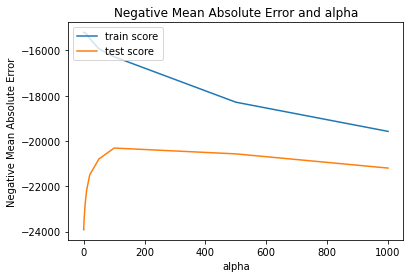

In [218]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [219]:
# display the best score and hyperparameter value
best_score = model_cv.best_score_
best_alpha = model_cv.best_params_['alpha']

print(" The highest neg MAE is {0} at alpha = {1}".format(best_score, best_alpha))

 The highest neg MAE is -20311.963533352435 at alpha = 100


In [220]:
## use the best hyperparameter value and create a model using Lasso
alpha = best_alpha

lasso6 = Lasso(alpha=alpha)
        
lasso6.fit(X_train[cols], y_train) 

Lasso(alpha=100)

In [221]:
## display the features and the coefficient values that are non-zero
coef_list = pd.DataFrame(list(zip(X_train.columns,lasso6.coef_)),columns=['Feature','Coeff'])
coef_list = coef_list[coef_list['Coeff']!=0]
coef_list['Abs_Coeff'] = coef_list['Coeff'].apply(lambda x: abs(x))
coef_list = coef_list.sort_values('Abs_Coeff',ascending=False)
coef_list

Feature         Coeff     Abs_Coeff
200      Electrical_FuseF -30350.055589  30350.055589
201      Electrical_FuseP -28565.873726  28565.873726
12              GrLivArea  26388.201254  26388.201254
71   Neighborhood_Edwards -26300.933001  26300.933001
72   Neighborhood_Gilbert -22669.403155  22669.403155
2             OverallQual  22427.141572  22427.141572
147   Exterior2nd_ImStucc -22186.987406  22186.987406
199          CentralAir_Y -22019.421380  22019.421380
142   Exterior2nd_Brk Cmn  21929.951100  21929.951100
18           KitchenAbvGr -21692.440979  21692.440979
75   Neighborhood_Mitchel -19640.907082  19640.907082
78    Neighborhood_NWAmes -18567.273715  18567.273715
167      Foundation_PConc -18502.479363  18502.479363
57        LandContour_Lvl  18450.351761  18450.351761
55        LandContour_HLS  18283.411807  18283.411807
76     Neighborhood_NAmes -17465.478847  17465.478847
124      RoofMatl_Tar&Grv  17204.326212  17204.326212
102       Condition2_RRAn -16836.041372  16836.041372
103       Condition2_RRNn -16344.139684  16344.139684
156    MasVnrType_BrkFace -16298.967616  16298.967616
69   Neighborhood_CollgCr -16160.143499  16160.143499
172           BsmtQual_Gd  15482.042145  15482.042145
10               2ndFlrSF  14935.270046  14935.270046
21             GarageCars  14464.798900  14464.798900
168       Foundation_Slab -13617.149464  13617.149464
81   Neighborhood_OldTown -13276.596256  13276.596256
84   Neighborhood_SawyerW -13168.576783  13168.576783
82     Neighborhood_SWISU -13040.706373  13040.706373
53           LotShape_IR3 -12107.668798  12107.668798
87    Neighborhood_Timber  11873.742729  11873.742729
155   Exterior2nd_Wd Shng -11646.887883  11646.887883
105       BldgType_Duplex  11547.725712  11547.725712
234          SaleType_CWD  11467.029700  11467.029700
79   Neighborhood_NoRidge -11273.734450  11273.734450
89       Condition1_Feedr -11142.656374  11142.656374
207       Functional_Maj2  10723.415072  10723.415072
176           BsmtCond_TA  10087.986397  10087.986397
95        Condition1_RRNe   9714.713590   9714.713590
219    GarageType_BuiltIn  -9590.629005   9590.629005
108     HouseStyle_1.5Unf  -9382.230904   9382.230904
30              house_age  -9066.551872   9066.551872
49            MSZoning_RL   8885.401971   8885.401971
13           BsmtFullBath   8158.475106   8158.475106
70   Neighborhood_Crawfor   8104.558030   8104.558030
162          ExterCond_Fa   7805.933569   7805.933569
161          ExterQual_TA   6578.193711   6578.193711
59      LotConfig_CulDSac   6519.541273   6519.541273
51            Street_Pave   6380.840054   6380.840054
63          LandSlope_Mod   6267.636219   6267.636219
218    GarageType_Basment  -5918.045929   5918.045929
36       MSSubClass_SC_20   5829.721880   5829.721880
19           TotRmsAbvGrd   5780.676954   5780.676954
15               FullBath   5673.496427   5673.496427
52           LotShape_IR2   5338.520524   5338.520524
104       BldgType_2fmCon   5072.007772   5072.007772
3             OverallCond   4928.848391   4928.848391
73    Neighborhood_IDOTRR  -4815.617044   4815.617044
68   Neighborhood_ClearCr  -4662.828364   4662.828364
16               HalfBath   4508.901623   4508.901623
180      BsmtFinType1_BLQ  -4487.184303   4487.184303
240          SaleType_Oth   4368.732872   4368.732872
217     GarageType_Attchd  -4254.726051   4254.726051
222      GarageFinish_RFn  -4241.315823   4241.315823
4              MasVnrArea   3978.418307   3978.418307
33      MSSubClass_SC_160  -3915.834379   3915.834379
151     Exterior2nd_Stone  -3601.433330   3601.433330
148   Exterior2nd_MetalSd   3597.847662   3597.847662
47            MSZoning_FV   3461.388724   3461.388724
23             WoodDeckSF   3390.493750   3390.493750
60          LotConfig_FR2  -3373.813590   3373.813590
174           BsmtCond_Gd  -3347.774012   3347.774012
179       BsmtExposure_No  -3326.131118   3326.131118
20             Fireplaces   3166.163164   3166.163164
152    Exterior2nd_Stu

In [222]:
coef_list.to_csv('lasso6.csv')

In [223]:
## get the shape of the coefficient list

coef_list.shape

(118, 3)

In [224]:
## predict using the Lasso model
y_train_pred = lasso6.predict(X_train[cols])
y_test_pred = lasso6.predict(X_test[cols])

In [225]:
# print the Train and Test r-squared scores
print("Train r2 score: " + str(r2_score(y_train,y_train_pred)))
print("Test r2 score: " + str(r2_score(y_test,y_test_pred)))

Train r2 score: 0.8777746402294562
Test r2 score: 0.8777118390494913


#### The top variables with all input features and top5 features removed

**All features in input**

    Feature	Coeff
    Condition2_PosN	-99167.10595
    RoofMatl_WdShngl	72033.21509
    Neighborhood_NoRidge	56604.54957
    Neighborhood_StoneBr	40008.33502
    Neighborhood_NridgHt	33583.29879
    KitchenQual_Gd	-27329.07237
    KitchenQual_TA	-26453.63883
    GrLivArea	24955.95073
    Exterior2nd_Stucco	-22566.13277
    KitchenAbvGr	-20081.9342


**Top 5 features removed**

    Feature	Coeff
    Electrical_FuseF	-30350.05559
    Electrical_FuseP	-28565.87373
    GrLivArea	26388.20125
    Neighborhood_Edwards	-26300.933
    Neighborhood_Gilbert	-22669.40316
    OverallQual	22427.14157
    Exterior2nd_ImStucc	-22186.98741
    CentralAir_Y	-22019.42138
    Exterior2nd_Brk Cmn	21929.9511
    KitchenAbvGr	-21692.44098

In [226]:
print('**** End *****')

**** End *****
